# DV Case Study


### Hate Crime Analysis

#### Problem Statement: What are trends and patterns in the rate of hate crimes during elections?
                  What are the factors that influence the rate of hate crime in a particular state?
                   Are certain demographics more likey to instigate hate crimes?
                   Why do some states have more reported hate incidents than others?
                   What factors result in the increase in average hate crime rate?
                   Which is the most significant determinant of population-adjusted hate crimes and hate incidents across
                   the United States?

### Target variable : average hate crime rate

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns



## Data preprocessing

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasets/hate_crimes.csv")

## Describing the dataset

In [ ]:
df.head()

state  median_household_income  share_unemployed_seasonal  \
0     Alabama                    42278                      0.060   
1      Alaska                    67629                      0.064   
2     Arizona                    49254                      0.063   
3    Arkansas                    44922                      0.052   
4  California                    60487                      0.059   

   share_population_in_metro_areas  share_population_with_high_school_degree  \
0                             0.64                                     0.821   
1                             0.63                                     0.914   
2                             0.90                                     0.842   
3                             0.69                                     0.824   
4                             0.97                                     0.806   

   share_non_citizen  share_white_poverty  gini_index  share_non_white  \
0               0.02                 0.12       0.472             0.35   
1               0.04                 0.06       0.422             0.42   
2               0.10                 0.09       0.455             0.49   
3               0.04                 0.12       0.458             0.26   
4               0.13                 0.09       0.471             0.61   

   share_voters_voted_trump  hate_crimes_per_100k_splc  \
0                      0.63                   0.125839   
1                      0.53                   0.143740   
2                      0.50                   0.225320   
3                      0.60                   0.069061   
4                      0.33                   0.255805   

   avg_hatecrimes_per_100k_fbi  
0                     1.806410  
1                     1.656700  
2                     3.413928  
3                     0.869209  
4                     2.397986

In [ ]:
df.shape

(51, 12)

In [ ]:
df.columns

Index(['state', 'median_household_income', 'share_unemployed_seasonal',
       'share_population_in_metro_areas',
       'share_population_with_high_school_degree', 'share_non_citizen',
       'share_white_poverty', 'gini_index', 'share_non_white',
       'share_voters_voted_trump', 'hate_crimes_per_100k_splc',
       'avg_hatecrimes_per_100k_fbi'],
      dtype='object')

## Data reduction

### Dropping the column 'hate_crimes_per_100k_splc' as it is redundant and the column 'avg_hatecrimes_per_100k_fbi' gives information which is trustworthy and valid

In [ ]:
df.drop(['hate_crimes_per_100k_splc'], axis = 1, inplace = True)


In [ ]:
df.head()

state  median_household_income  share_unemployed_seasonal  \
0     Alabama                    42278                      0.060   
1      Alaska                    67629                      0.064   
2     Arizona                    49254                      0.063   
3    Arkansas                    44922                      0.052   
4  California                    60487                      0.059   

   share_population_in_metro_areas  share_population_with_high_school_degree  \
0                             0.64                                     0.821   
1                             0.63                                     0.914   
2                             0.90                                     0.842   
3                             0.69                                     0.824   
4                             0.97                                     0.806   

   share_non_citizen  share_white_poverty  gini_index  share_non_white  \
0               0.02                 0.12       0.472             0.35   
1               0.04                 0.06       0.422             0.42   
2               0.10                 0.09       0.455             0.49   
3               0.04                 0.12       0.458             0.26   
4               0.13                 0.09       0.471             0.61   

   share_voters_voted_trump  avg_hatecrimes_per_100k_fbi  
0                      0.63                     1.806410  
1                      0.53                     1.656700  
2                      0.50                     3.413928  
3                      0.60                     0.869209  
4                      0.33                     2.397986

In [ ]:
df.describe(include = 'all')

state  median_household_income  share_unemployed_seasonal  \
count        51                51.000000                  51.000000   
unique       51                      NaN                        NaN   
top     Alabama                      NaN                        NaN   
freq          1                      NaN                        NaN   
mean        NaN             55223.607843                   0.049569   
std         NaN              9208.478170                   0.010698   
min         NaN             35521.000000                   0.028000   
25%         NaN             48657.000000                   0.042000   
50%         NaN             54916.000000                   0.051000   
75%         NaN             60719.000000                   0.057500   
max         NaN             76165.000000                   0.073000   

        share_population_in_metro_areas  \
count                         51.000000   
unique                              NaN   
top                                 NaN   
freq                                NaN   
mean                           0.750196   
std                            0.181587   
min                            0.310000   
25%                            0.630000   
50%                            0.790000   
75%                            0.895000   
max                            1.000000   

        share_population_with_high_school_degree  share_non_citizen  \
count                                  51.000000          51.000000   
unique                                       NaN                NaN   
top                                          NaN                NaN   
freq                                         NaN                NaN   
mean                                    0.869118           0.054583   
std                                     0.034073           0.030130   
min                                     0.799000           0.010000   
25%                                     0.840500           0.030000   
50%                                     0.874000           0.050000   
75%                                     0.898000           0.080000   
max                                     0.918000           0.130000   

        share_white_poverty  gini_index  share_non_white  \
count             51.000000   51.000000        51.000000   
unique                  NaN         NaN              NaN   
top                     NaN         NaN              NaN   
freq                    NaN         NaN              NaN   
mean               0.091765    0.453765         0.315686   
std                0.024715    0.020891         0.164915   
min                0.040000    0.419000         0.060000   
25%                0.075000    0.440000         0.195000   
50%                0.090000    0.454000         0.280000   
75%                0.100000    0.466500         0.420000   
max                0.170000    0.532000         0.810000   

        share_voters_voted_trump  avg_hatecrimes_per_100k_fbi  
count                   51.00000                    51.000000  
unique                       NaN                          NaN  
top                          NaN                          NaN  
freq                         NaN                          NaN  
mean                     0.49000                     2.367613  
std                      0.11871                     1.697016  
min                      0.04000                     0.266941  
25%                      0.41500                     1.303706  
50%                      0.49000                     2.037054  
75%                      0.57500                     3.168247  
max                      0.70000                    10.953480

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   state                                     51 non-null     object 
 1   median_household_income                   51 non-null     int64  
 2   share_unemployed_seasonal                 51 non-null     float64
 3   share_population_in_metro_areas           51 non-null     float64
 4   share_population_with_high_school_degree  51 non-null     float64
 5   share_non_citizen                         51 non-null     float64
 6   share_white_poverty                       51 non-null     float64
 7   gini_index                                51 non-null     float64
 8   share_non_white                           51 non-null     float64
 9   share_voters_voted_trump                  51 non-null     float64
 10  avg_hatecrimes_per_100k_fbi             

In [ ]:
df.mean()

<ipython-input-21-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


median_household_income                     55223.607843
share_unemployed_seasonal                       0.049569
share_population_in_metro_areas                 0.750196
share_population_with_high_school_degree        0.869118
share_non_citizen                               0.054583
share_white_poverty                             0.091765
gini_index                                      0.453765
share_non_white                                 0.315686
share_voters_voted_trump                        0.490000
avg_hatecrimes_per_100k_fbi                     2.367613
dtype: float64

In [ ]:
df.median()

<ipython-input-22-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


median_household_income                     54916.000000
share_unemployed_seasonal                       0.051000
share_population_in_metro_areas                 0.790000
share_population_with_high_school_degree        0.874000
share_non_citizen                               0.050000
share_white_poverty                             0.090000
gini_index                                      0.454000
share_non_white                                 0.280000
share_voters_voted_trump                        0.490000
avg_hatecrimes_per_100k_fbi                     2.037054
dtype: float64

## Handling null values

In [ ]:
df.isnull().sum()

state                                       0
median_household_income                     0
share_unemployed_seasonal                   0
share_population_in_metro_areas             0
share_population_with_high_school_degree    0
share_non_citizen                           3
share_white_poverty                         0
gini_index                                  0
share_non_white                             0
share_voters_voted_trump                    0
hate_crimes_per_100k_splc                   4
avg_hatecrimes_per_100k_fbi                 1
dtype: int64

In [ ]:
df.isnull().sum().sum()

8

## Filling the null values with the appropriate value for each attribute

In [ ]:
df['median_household_income'] = df['median_household_income'].fillna((df['median_household_income'].median()))
df['share_non_citizen'] = df['share_non_citizen'].fillna(df['share_non_citizen'].mean())

df['avg_hatecrimes_per_100k_fbi'] = df['avg_hatecrimes_per_100k_fbi'].fillna(df['avg_hatecrimes_per_100k_fbi'].mean())


In [ ]:
df.head()

state  median_household_income  share_unemployed_seasonal  \
0     Alabama                    42278                      0.060   
1      Alaska                    67629                      0.064   
2     Arizona                    49254                      0.063   
3    Arkansas                    44922                      0.052   
4  California                    60487                      0.059   

   share_population_in_metro_areas  share_population_with_high_school_degree  \
0                             0.64                                     0.821   
1                             0.63                                     0.914   
2                             0.90                                     0.842   
3                             0.69                                     0.824   
4                             0.97                                     0.806   

   share_non_citizen  share_white_poverty  gini_index  share_non_white  \
0               0.02                 0.12       0.472             0.35   
1               0.04                 0.06       0.422             0.42   
2               0.10                 0.09       0.455             0.49   
3               0.04                 0.12       0.458             0.26   
4               0.13                 0.09       0.471             0.61   

   share_voters_voted_trump  avg_hatecrimes_per_100k_fbi  
0                      0.63                     1.806410  
1                      0.53                     1.656700  
2                      0.50                     3.413928  
3                      0.60                     0.869209  
4                      0.33                     2.397986

In [ ]:
df.isnull().sum()

state                                       0
median_household_income                     0
share_unemployed_seasonal                   0
share_population_in_metro_areas             0
share_population_with_high_school_degree    0
share_non_citizen                           0
share_white_poverty                         0
gini_index                                  0
share_non_white                             0
share_voters_voted_trump                    0
avg_hatecrimes_per_100k_fbi                 0
dtype: int64

## Detecting Outliers

In [ ]:

df_outliers = pd.DataFrame(index=df.columns, columns=['outliers', 'outliers%'])

for col in df.columns:
    if any(x in str(df[col].dtype) for x in ['int', 'float']):

        df_outliers.loc[col, 'q1'] = df[col].quantile(0.25)

        df_outliers.loc[col, 'q3'] = df[col].quantile(0.75)

        df_outliers.loc[col, 'iqr'] = df_outliers.loc[col, 'q3'] - df_outliers.loc[col, 'q1']

        df_outliers.loc[col, 'lower'] = df_outliers.loc[col, 'q1'] - (3 * df_outliers.loc[col, 'iqr'])

        df_outliers.loc[col, 'upper'] = df_outliers.loc[col, 'q3'] + (3 * df_outliers.loc[col, 'iqr'])

        df_outliers.loc[col, 'min'] = df[col].min()

        df_outliers.loc[col, 'max'] = df[col].max()

        df_outliers.loc[col, 'outliers'] = ((df[col] < df_outliers.loc[col, 'lower']) | (df[col] > df_outliers.loc[col,'upper'])).sum()

        df_outliers.loc[col, 'outliers%'] = np.round(df_outliers.loc[col,'outliers'] / len(df) *100)

df_outliers

outliers outliers%            q1  \
state                                         NaN       NaN           NaN   
median_household_income                         0       0.0  48657.000000   
share_unemployed_seasonal                       0       0.0      0.042000   
share_population_in_metro_areas                 0       0.0      0.630000   
share_population_with_high_school_degree        0       0.0      0.840500   
share_non_citizen                               0       0.0      0.030000   
share_white_poverty                             0       0.0      0.075000   
gini_index                                      0       0.0      0.440000   
share_non_white                                 0       0.0      0.195000   
share_voters_voted_trump                        0       0.0      0.415000   
avg_hatecrimes_per_100k_fbi                     1       2.0      1.303706   

                                                    q3           iqr  \
state                                              NaN           NaN   
median_household_income                   60719.000000  12062.000000   
share_unemployed_seasonal                     0.057500      0.015500   
share_population_in_metro_areas               0.895000      0.265000   
share_population_with_high_school_degree      0.898000      0.057500   
share_non_citizen                             0.080000      0.050000   
share_white_poverty                           0.100000      0.025000   
gini_index                                    0.466500      0.026500   
share_non_white                               0.420000      0.225000   
share_voters_voted_trump                      0.575000      0.160000   
avg_hatecrimes_per_100k_fbi                   3.168247      1.864541   

                                                 lower        upper  \
state                                              NaN          NaN   
median_household_income                   1.247100e+04  96905.00000   
share_unemployed_seasonal                -4.500000e-03      0.10400   
share_population_in_metro_areas          -1.650000e-01      1.69000   
share_population_with_high_school_degree  6.680000e-01      1.07050   
share_non_citizen                        -1.200000e-01      0.23000   
share_white_poverty                       2.775558e-17      0.17500   
gini_index                                3.605000e-01      0.54600   
share_non_white                          -4.800000e-01      1.09500   
share_voters_voted_trump                 -6.500000e-02      1.05500   
avg_hatecrimes_per_100k_fbi              -4.289917e+00      8.76187   

                                                   min          max  
state                                              NaN          NaN  
median_household_income                   35521.000000  76165.00000  
share_unemployed_seasonal                     0.028000      0.07300  
share_population_in_metro_areas               0.310000      1.00000  
share_population_with_high_school_degree      0.799000      0.91800  
share_non_citizen                             0.010000      0.13000  
share_white_poverty                           0.040000      0.17000  
gini_index                                    0.419000      0.53200  
share_non_white                               0.060000      0.81000  
share_voters_voted_trump                      0.040000      0.70000  
avg_hatecrimes_per_100k_fbi                   0.266941     10.95348

From the above dataframe, we can see that the 'avg_hatecrimes_per_100k_fbi' has an outlier. Here the outlier detection was done considering the Interquartile range(IQR)

In [ ]:
# outlier detection

from sklearn.ensemble import IsolationForest


In [ ]:
df_out = df[['avg_hatecrimes_per_100k_fbi']]
df_out.head()

avg_hatecrimes_per_100k_fbi
0                     1.806410
1                     1.656700
2                     3.413928
3                     0.869209
4                     2.397986

In [ ]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(df_out)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, n_estimators=50)

In [ ]:
df_out['scores']=model.decision_function(df_out[['avg_hatecrimes_per_100k_fbi']])
df_out['anomaly']=model.predict(df_out[['avg_hatecrimes_per_100k_fbi']])

df_out.head(10)


<ipython-input-30-651ff3f9d3cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['scores']=model.decision_function(df_out[['avg_hatecrimes_per_100k_fbi']])
<ipython-input-30-651ff3f9d3cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['anomaly']=model.predict(df_out[['avg_hatecrimes_per_100k_fbi']])


avg_hatecrimes_per_100k_fbi    scores  anomaly
0                     1.806410  0.144215        1
1                     1.656700  0.123984        1
2                     3.413928  0.124155        1
3                     0.869209  0.068929        1
4                     2.397986  0.126348        1
5                     2.804689  0.098705        1
6                     3.772701  0.056163        1
7                     1.469980  0.107346        1
8                    10.953480 -0.307770       -1
9                     0.698070  0.072206        1

In [ ]:

df.columns



Index(['state', 'median_household_income', 'share_unemployed_seasonal',
       'share_population_in_metro_areas',
       'share_population_with_high_school_degree', 'share_non_citizen',
       'share_white_poverty', 'gini_index', 'share_non_white',
       'share_voters_voted_trump', 'avg_hatecrimes_per_100k_fbi'],
      dtype='object')

In [ ]:
n = len(df.columns)
n


11

In [ ]:
#df.index

## Correlation Matrix

<ipython-input-37-91af3277b9af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


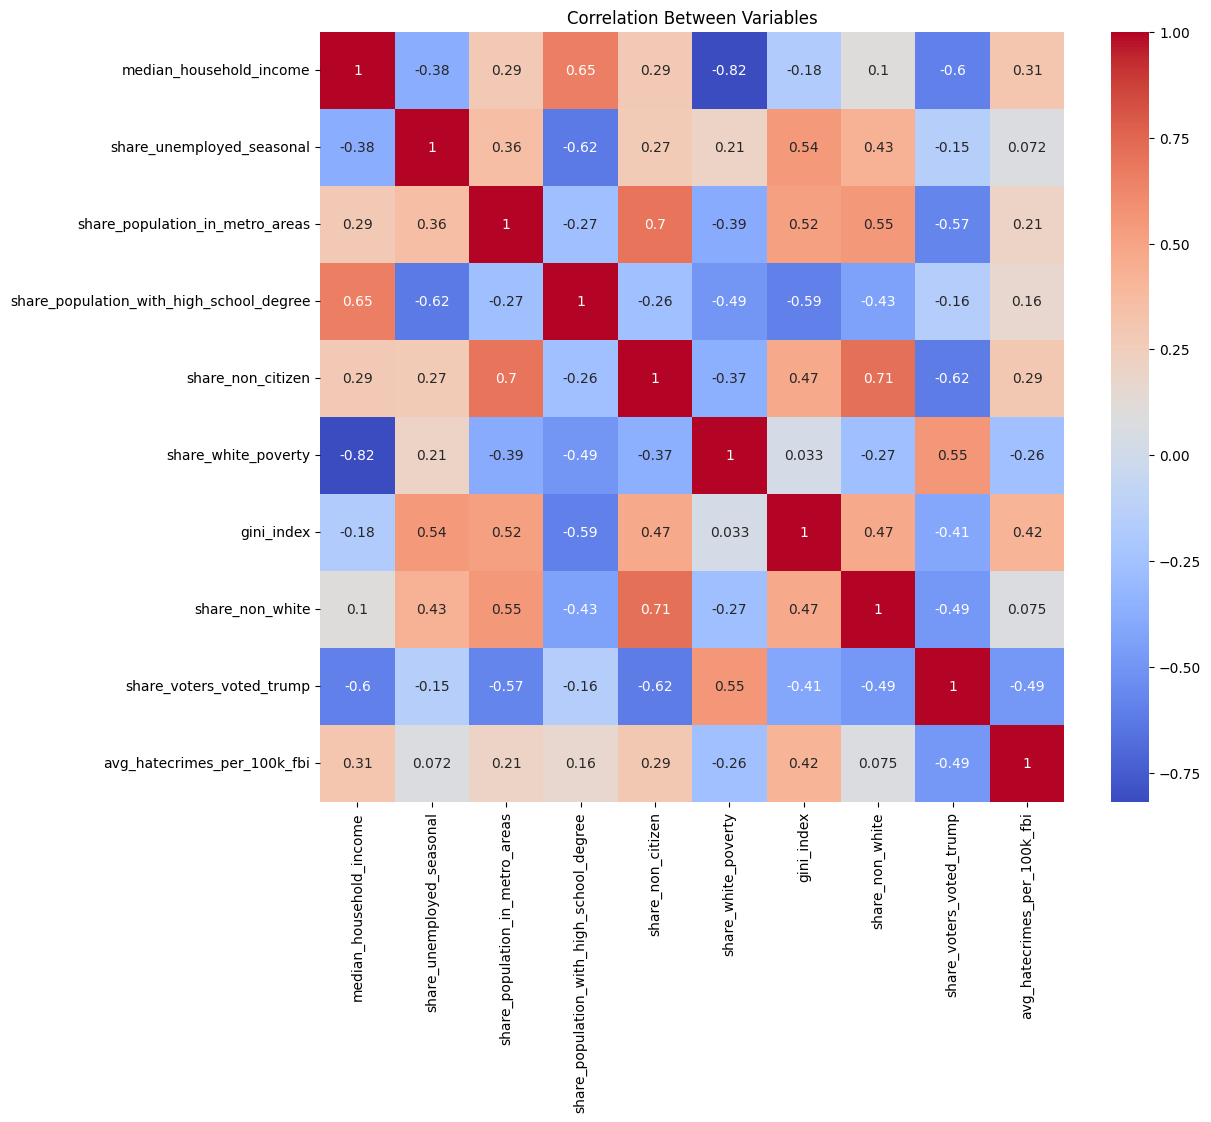

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()


### From the heatmap, we can see the correlation between the different attributes. With respect to the target variable ' average hatecrimes ' , the attribute 'gini_index' has moderate positive correlation.  Here, we can say as gini_index increase , the average hatecrime for a particular state also increases.


### The attribute 'share_voters_voted_trump' has moderate negative correlation with respect to 'average_hatecrimes'.  As 'share_voters_voted_trump'  number increases, the average_hatecrimes decreases.

### 'median_household_income' has low positive correlation. As median_household_income increases, average_hatecrimes also increases.


### Univariate analysis

Text(0.5, 1.0, 'Histogram for Median_household_income')

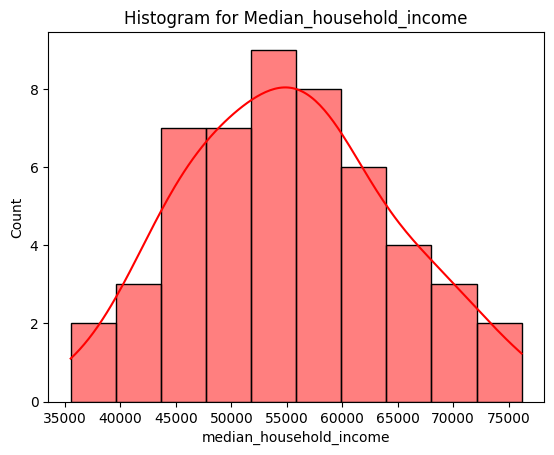

In [ ]:

sns.histplot(df['median_household_income'], kde=True, bins=10, color="r")
plt.title("Histogram for Median_household_income")

Text(0.5, 1.0, 'Histogram for Share_unemployed_seasonal')

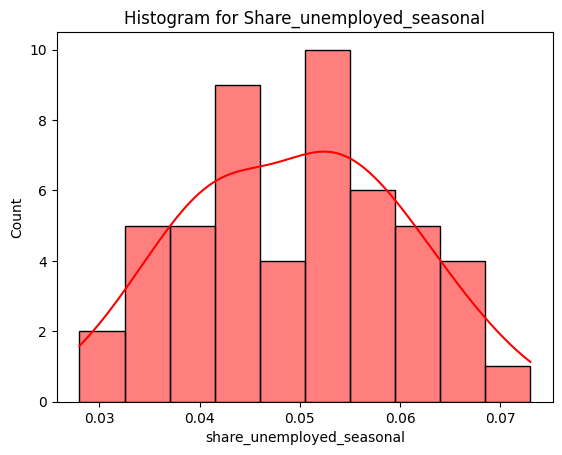

In [ ]:
sns.histplot(df['share_unemployed_seasonal'], kde=True, bins=10, color="r")
plt.title("Histogram for Share_unemployed_seasonal")

Text(0.5, 1.0, 'Histogram for share_population_in_metro_areas')

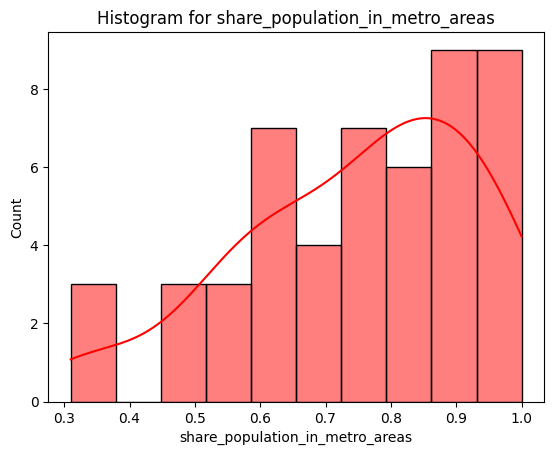

In [ ]:
sns.histplot(df['share_population_in_metro_areas'], kde=True, bins=10, color="r")
plt.title("Histogram for share_population_in_metro_areas")

Text(0.5, 1.0, 'Histogram for share_population_with_high_school_degree')

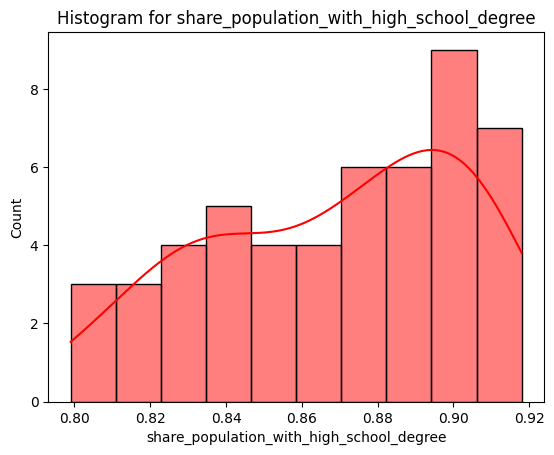

In [ ]:
sns.histplot(df['share_population_with_high_school_degree'], kde=True, bins=10, color="r")
plt.title("Histogram for share_population_with_high_school_degree")

Text(0.5, 1.0, 'Histogram for share_non_citizen ')

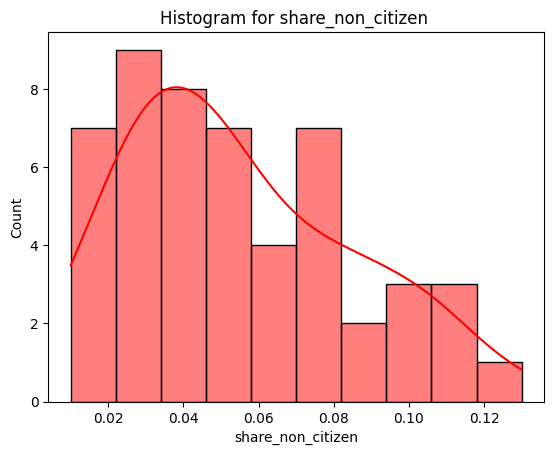

In [ ]:
sns.histplot(df['share_non_citizen'], kde=True, bins=10, color="r")
plt.title("Histogram for share_non_citizen ")

Text(0.5, 1.0, 'Histogram for share_white_poverty')

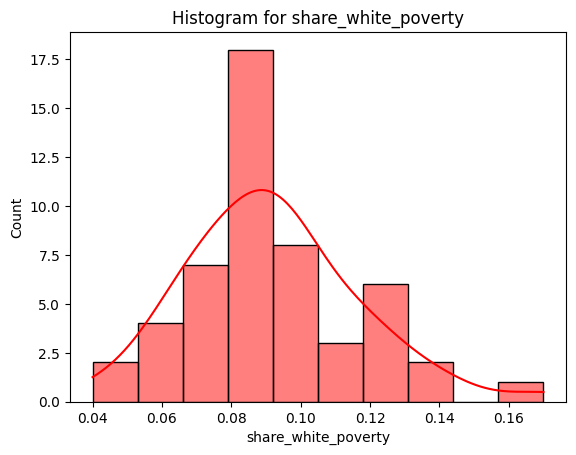

In [ ]:
sns.histplot(df['share_white_poverty'], kde=True, bins=10, color="r")
plt.title("Histogram for share_white_poverty")

Text(0.5, 1.0, 'Histogram for gini_index')

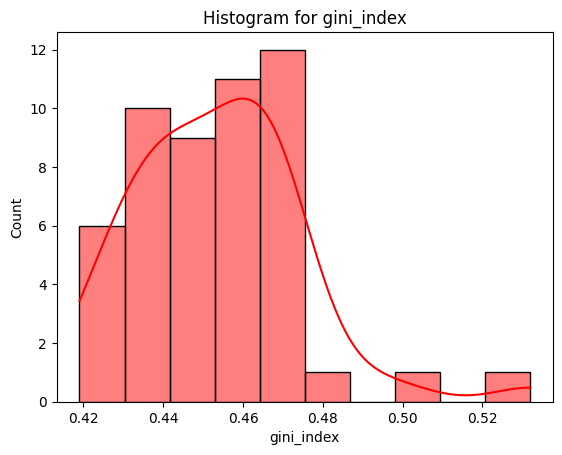

In [ ]:
sns.histplot(df['gini_index'], kde=True, bins=10, color="r")
plt.title("Histogram for gini_index")

Text(0.5, 1.0, 'Histogram for share_non_white')

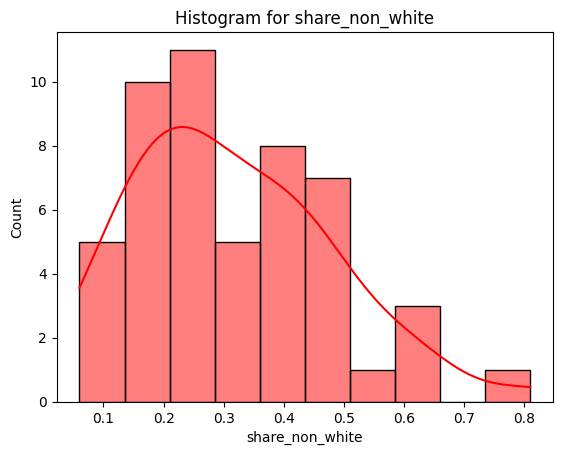

In [ ]:
sns.histplot(df['share_non_white'], kde=True, bins=10, color="r")
plt.title("Histogram for share_non_white")

Text(0.5, 1.0, 'Histogram for share_voters_voted_trump')

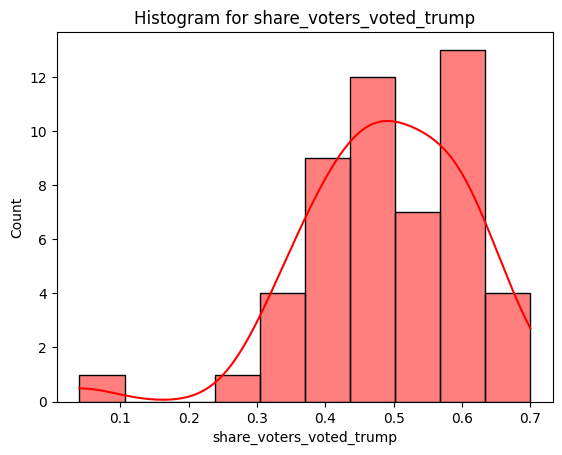

In [ ]:
sns.histplot(df['share_voters_voted_trump'], kde=True, bins=10, color="r")
plt.title("Histogram for share_voters_voted_trump")

Text(0.5, 1.0, 'Histogram for avg_hatecrimes_per_100k_fbi ')

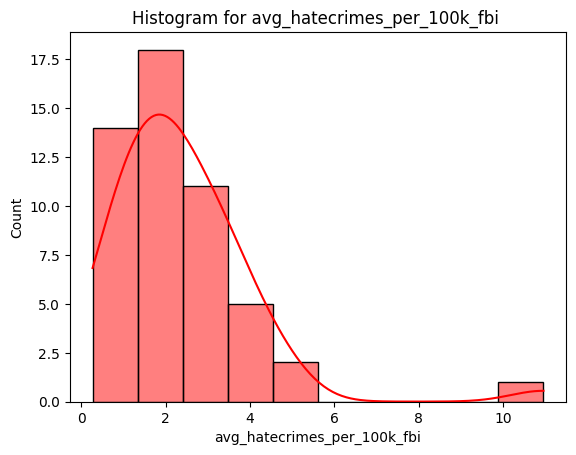

In [ ]:
sns.histplot(df['avg_hatecrimes_per_100k_fbi'], kde=True, bins=10, color="r")
plt.title("Histogram for avg_hatecrimes_per_100k_fbi ")

Text(0.5, 1.0, 'Boxplot')

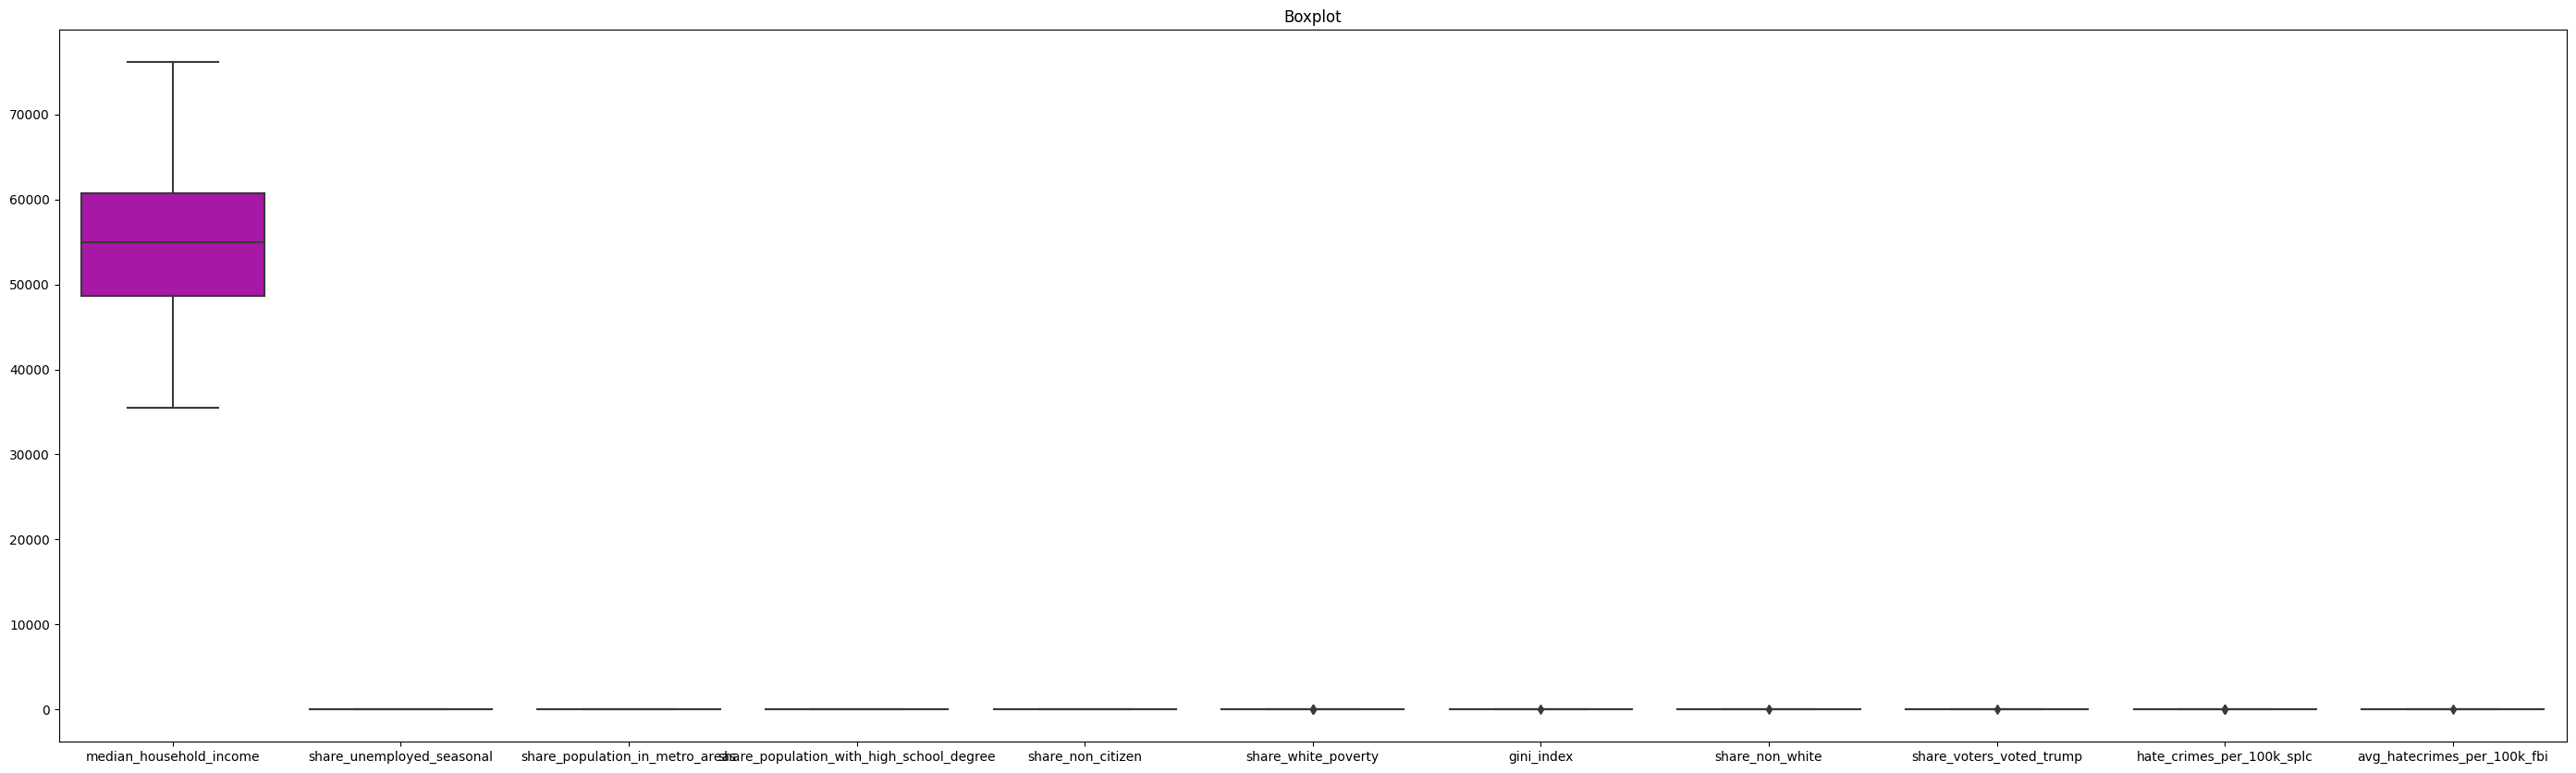

In [ ]:
plt.figure(figsize = (35,10))
sns.boxplot(data = df, color = 'm')
plt.title("Boxplot")


### We can see that the column "median_household_income" has a wider spread and ranges from 35000 to 80000

<Axes: >

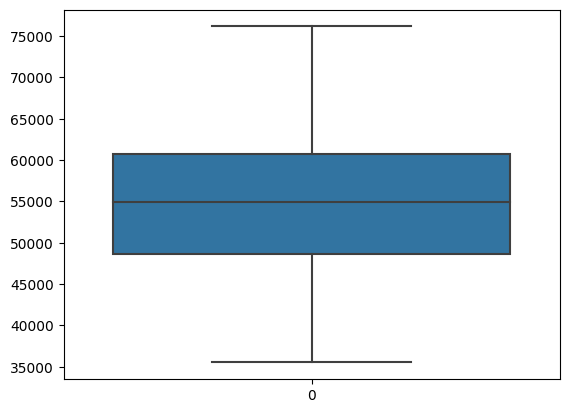

In [ ]:
sns.boxplot(df['median_household_income'])

<Axes: >

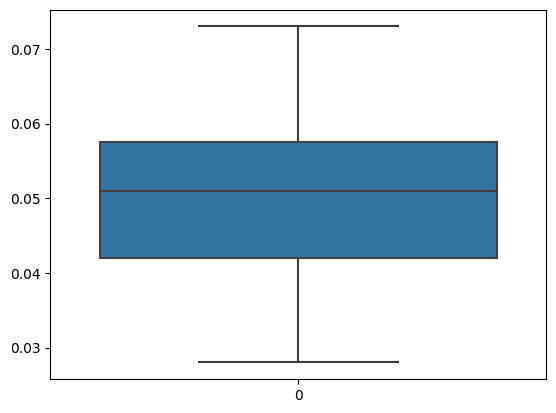

In [ ]:
sns.boxplot(df['share_unemployed_seasonal'])

<Axes: >

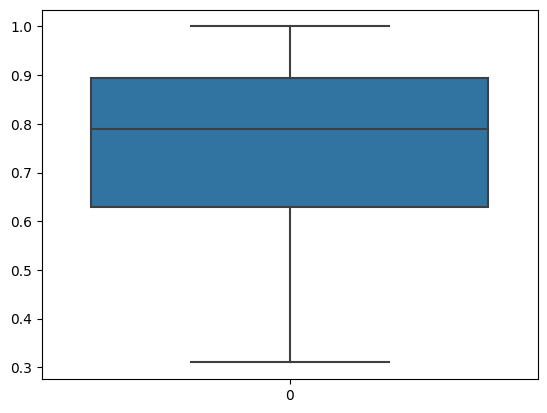

In [ ]:
sns.boxplot(df['share_population_in_metro_areas'])

<Axes: >

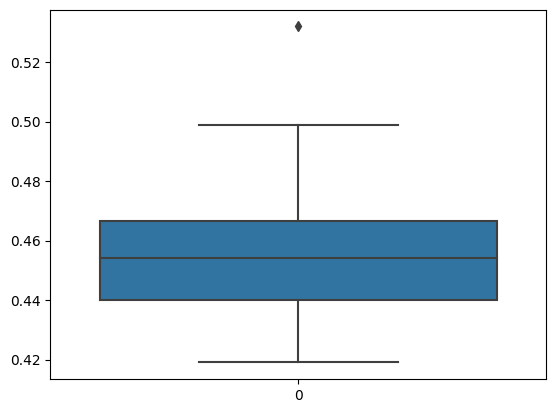

In [ ]:
sns.boxplot(df['gini_index'])

### Outlier is detected from the boxplot. We can see that most of the values are concentrated around 0.44 to 0.47

## Bivariate analysis

## Scatter plot

### To see if there is any linear relationship between the different attributes and the target variable

<Axes: xlabel='median_household_income', ylabel='avg_hatecrimes_per_100k_fbi'>

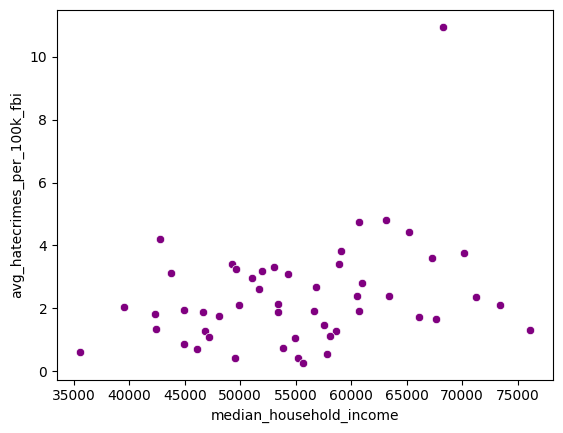

In [ ]:
sns.scatterplot(x = df['median_household_income'], y = df['avg_hatecrimes_per_100k_fbi'], data = df, color = 'purple')

 There is some positive correlation between median household income and average hatecrimes. We can see that there is an outlier present in our dataset.

<Axes: xlabel='share_unemployed_seasonal', ylabel='avg_hatecrimes_per_100k_fbi'>

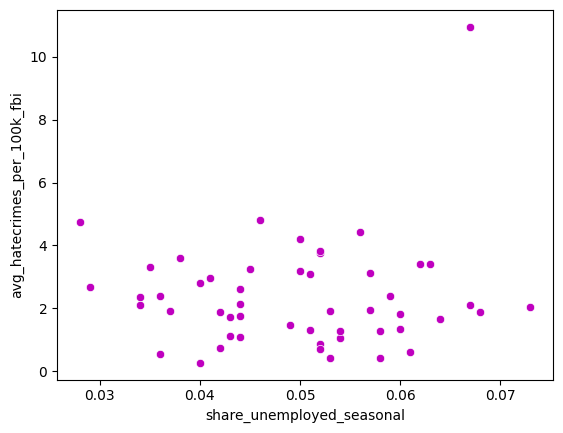

In [ ]:
sns.scatterplot(x = df['share_unemployed_seasonal'], y = df['avg_hatecrimes_per_100k_fbi'], color = 'm')

<Axes: xlabel='share_population_in_metro_areas', ylabel='avg_hatecrimes_per_100k_fbi'>

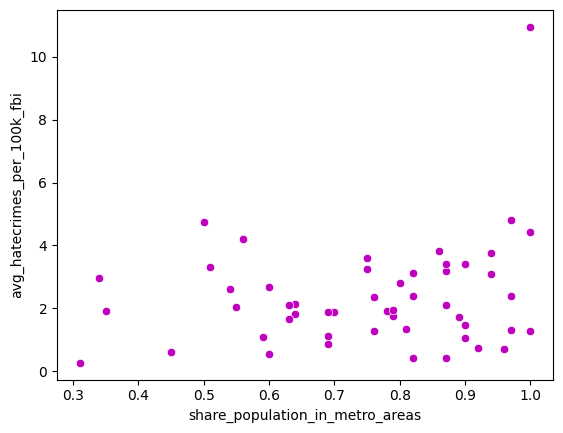

In [ ]:
sns.scatterplot(x = df['share_population_in_metro_areas'], y = df['avg_hatecrimes_per_100k_fbi'],color = 'm')

<Axes: xlabel='share_population_with_high_school_degree', ylabel='avg_hatecrimes_per_100k_fbi'>

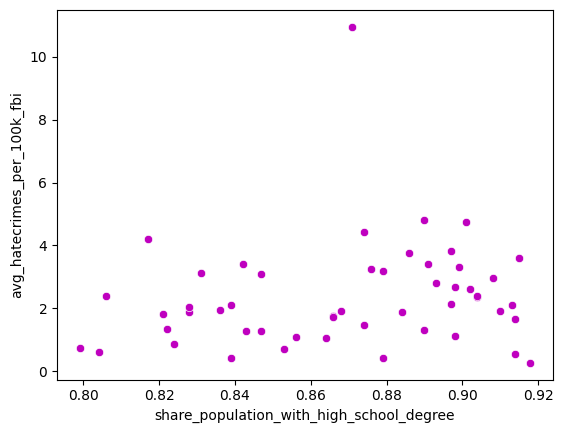

In [ ]:
sns.scatterplot(x = df['share_population_with_high_school_degree'], y = df['avg_hatecrimes_per_100k_fbi'],color = 'm')

<Axes: xlabel='share_non_citizen', ylabel='avg_hatecrimes_per_100k_fbi'>

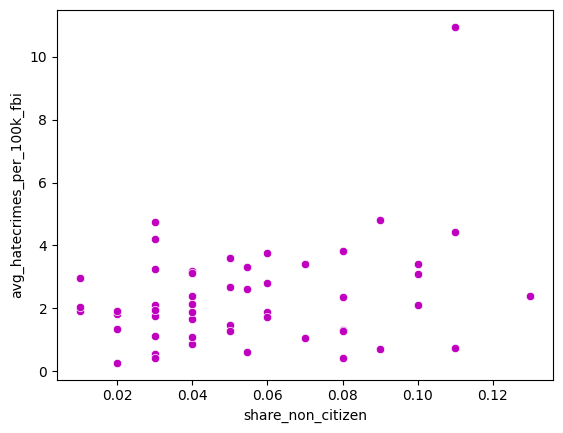

In [ ]:
sns.scatterplot(x = df['share_non_citizen'], y = df['avg_hatecrimes_per_100k_fbi'],color = 'm')

<Axes: xlabel='share_white_poverty', ylabel='avg_hatecrimes_per_100k_fbi'>

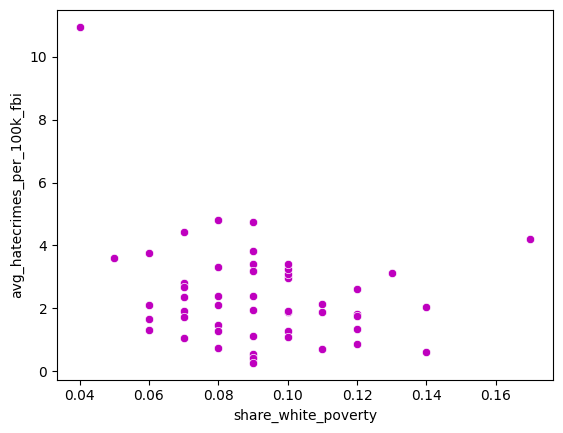

In [ ]:
sns.scatterplot(x = df['share_white_poverty'], y = df['avg_hatecrimes_per_100k_fbi'],color = 'm')

<Axes: xlabel='gini_index', ylabel='avg_hatecrimes_per_100k_fbi'>

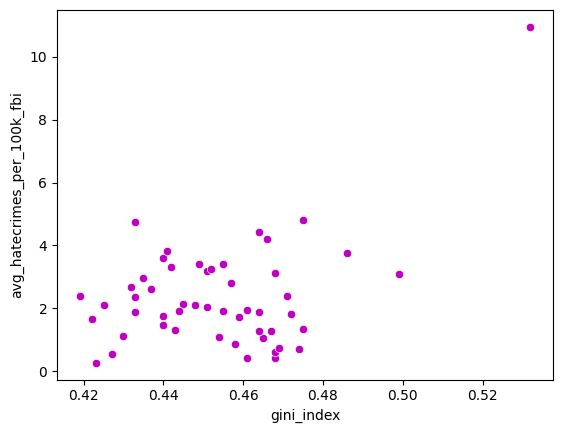

In [ ]:
sns.scatterplot(x = df['gini_index'], y = df['avg_hatecrimes_per_100k_fbi'],color = 'm')

### There is a moderate amount of positive correlation between 'gini_index' and 'average_hatecrimes'. We can say that as the gini_index increases, average_hatecrimes also increases.

<Axes: xlabel='share_non_white', ylabel='avg_hatecrimes_per_100k_fbi'>

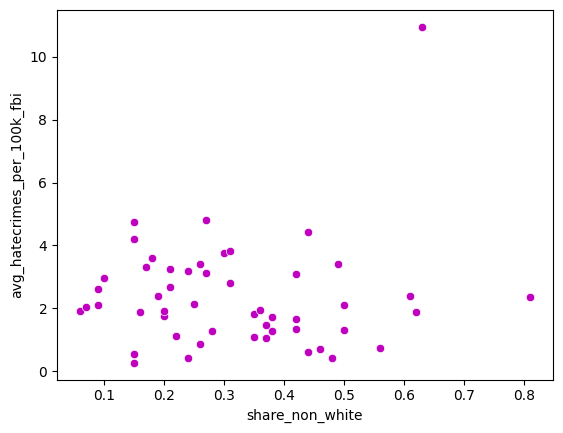

In [ ]:
sns.scatterplot(x = df['share_non_white'], y = df['avg_hatecrimes_per_100k_fbi'],color = 'm')

<Axes: xlabel='share_voters_voted_trump', ylabel='avg_hatecrimes_per_100k_fbi'>

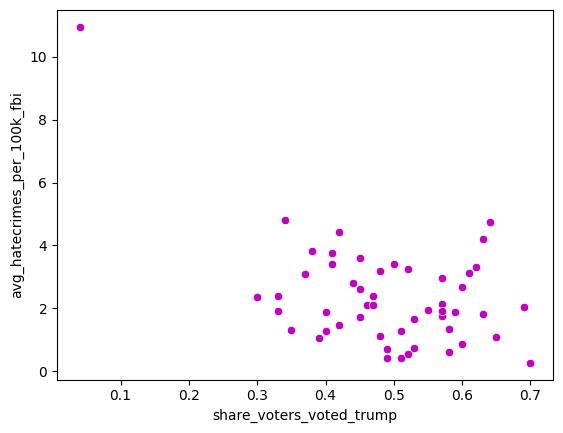

In [ ]:
sns.scatterplot(x = df['share_voters_voted_trump'], y = df['avg_hatecrimes_per_100k_fbi'],color = 'm')

### There is some amount of negative correlation between 'share_voters_voted_trump' and 'average_hatecrimes'.

### Lineplot

In [ ]:
df3 = df.sample(10)
df3.head()

state  median_household_income  share_unemployed_seasonal  \
37      Oregon                    58875                      0.062   
32    New York                    54310                      0.051   
44        Utah                    63383                      0.036   
46    Virginia                    66155                      0.043   
47  Washington                    59068                      0.052   

    share_population_in_metro_areas  share_population_with_high_school_degree  \
37                             0.87                                     0.891   
32                             0.94                                     0.847   
44                             0.82                                     0.904   
46                             0.89                                     0.866   
47                             0.86                                     0.897   

    share_non_citizen  share_white_poverty  gini_index  share_non_white  \
37               0.07                 0.10       0.449             0.26   
32               0.10                 0.10       0.499             0.42   
44               0.04                 0.08       0.419             0.19   
46               0.06                 0.07       0.459             0.38   
47               0.08                 0.09       0.441             0.31   

    share_voters_voted_trump  hate_crimes_per_100k_splc  \
37                      0.41                   0.832850   
32                      0.37                   0.350620   
44                      0.47                   0.136547   
46                      0.45                   0.363249   
47                      0.38                   0.677488   

    avg_hatecrimes_per_100k_fbi  
37                     3.394886  
32                     3.102164  
44                     2.384065  
46                     1.724755  
47                     3.817740

we can infer that there is influence of income on hate crime

<Axes: xlabel='median_household_income', ylabel='avg_hatecrimes_per_100k_fbi'>

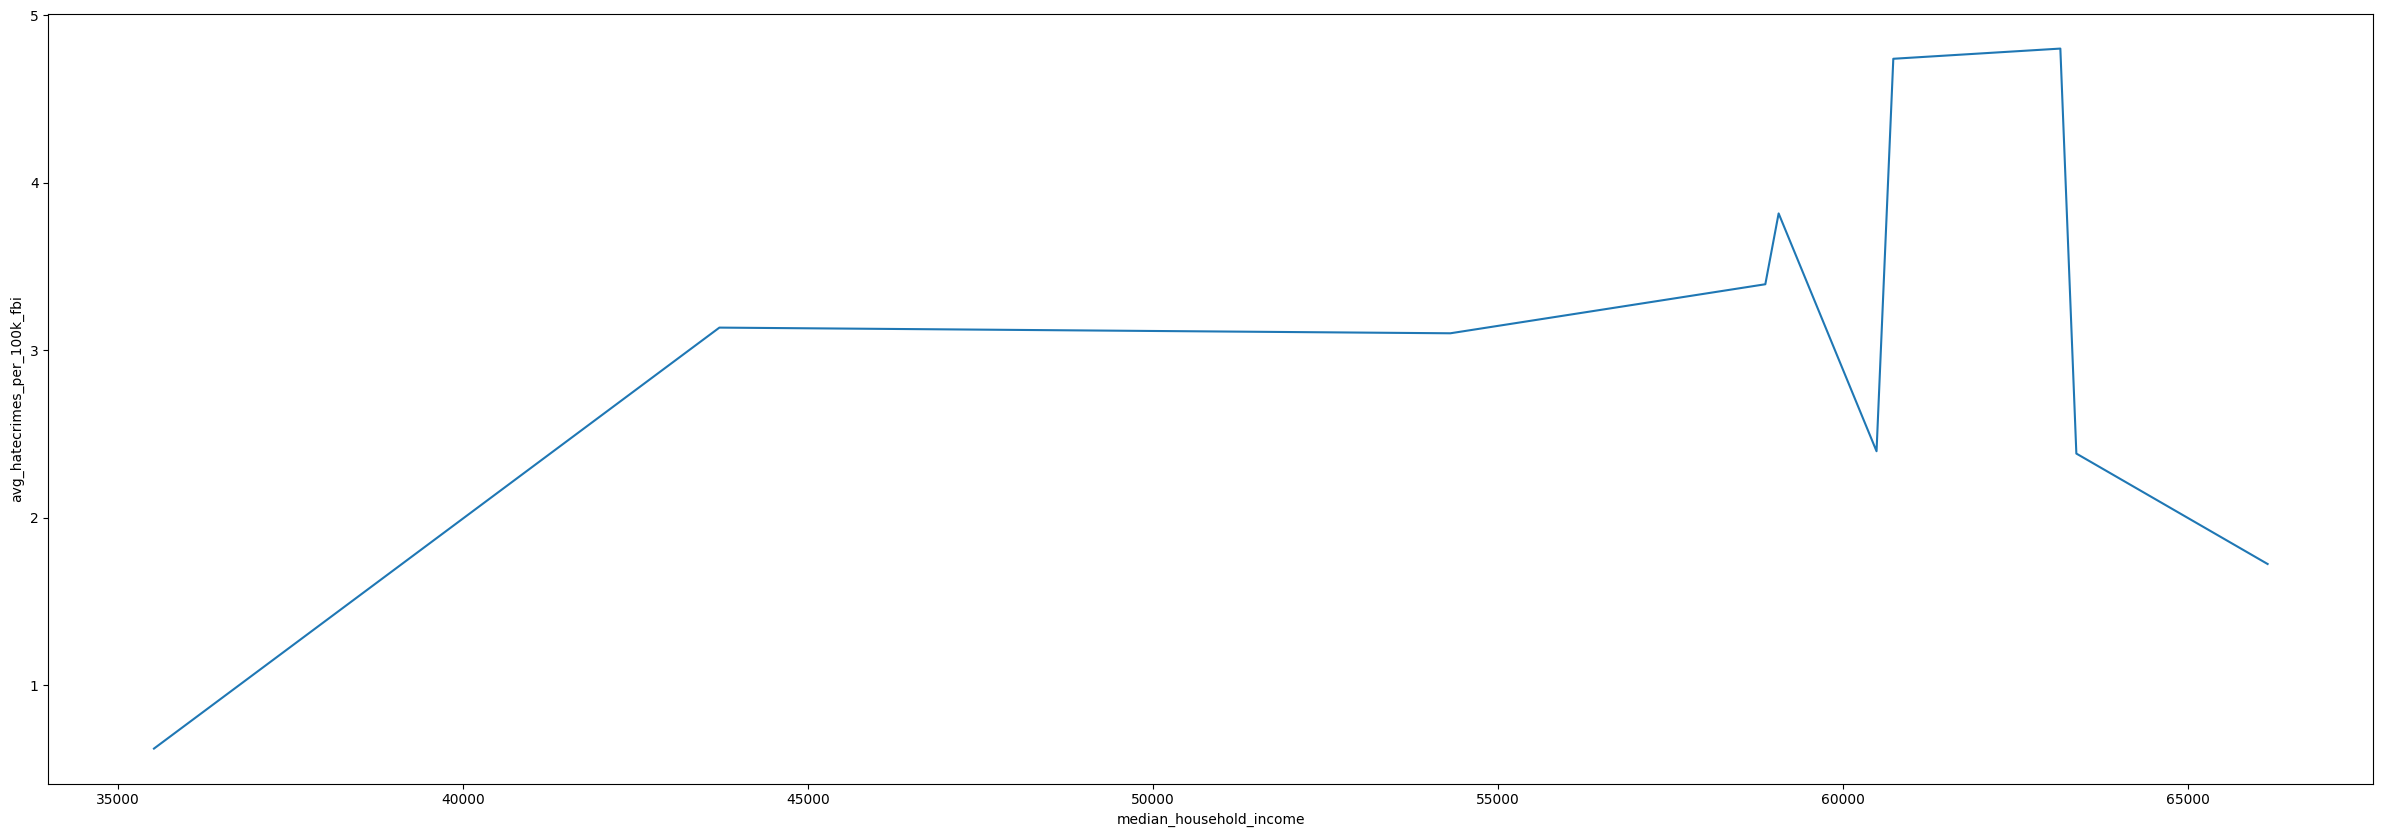

In [ ]:
plt.figure(figsize = (30,10))
sns.lineplot(x= 'median_household_income',y ='avg_hatecrimes_per_100k_fbi', data = df3)

<Axes: xlabel='share_unemployed_seasonal', ylabel='avg_hatecrimes_per_100k_fbi'>

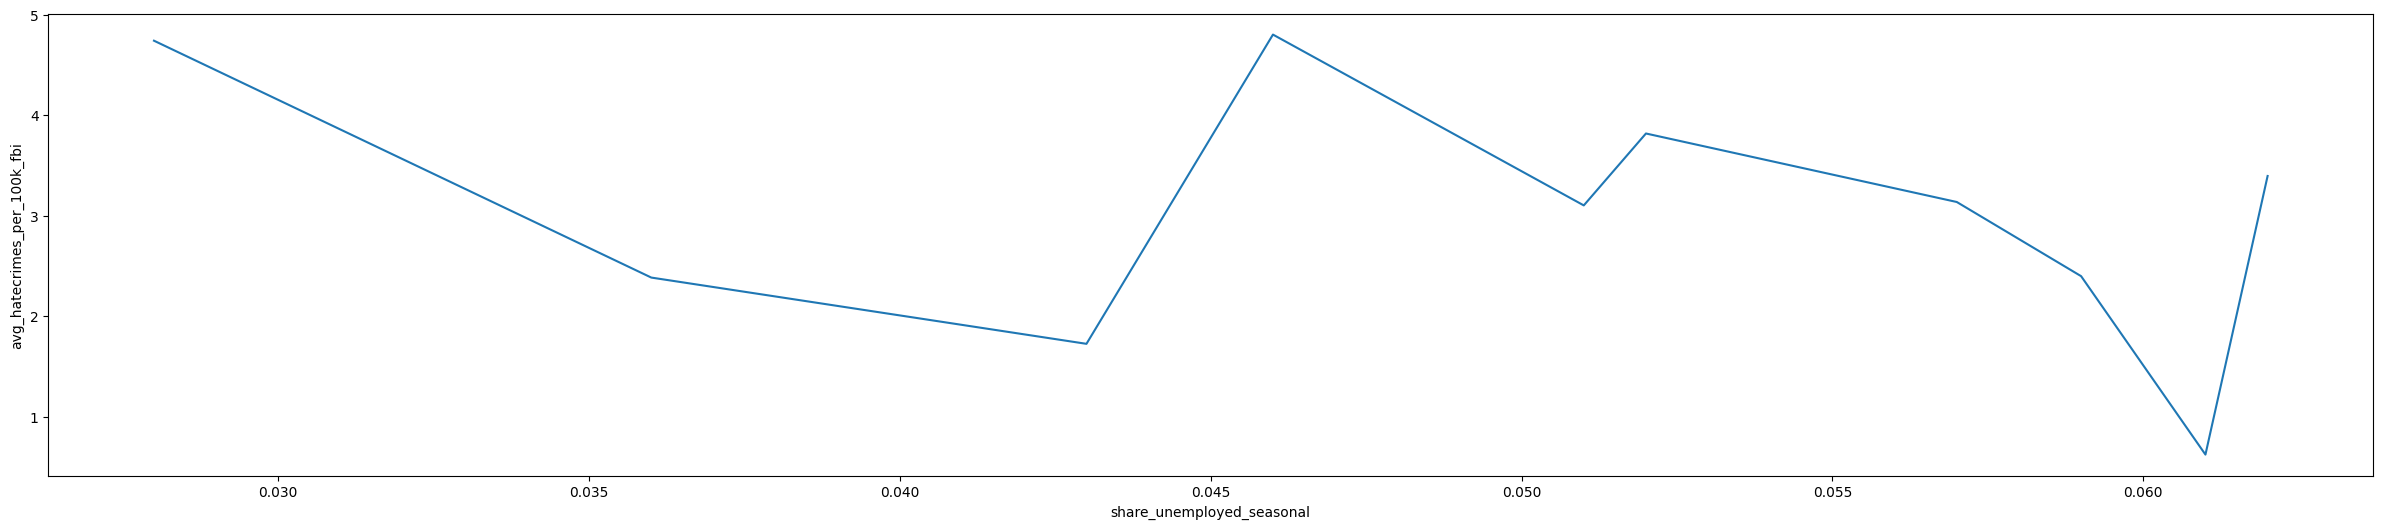

In [ ]:
plt.figure(figsize = (30,6))
sns.lineplot(x= 'share_unemployed_seasonal',y = 'avg_hatecrimes_per_100k_fbi', data = df3)

<Axes: xlabel='share_population_in_metro_areas', ylabel='avg_hatecrimes_per_100k_fbi'>

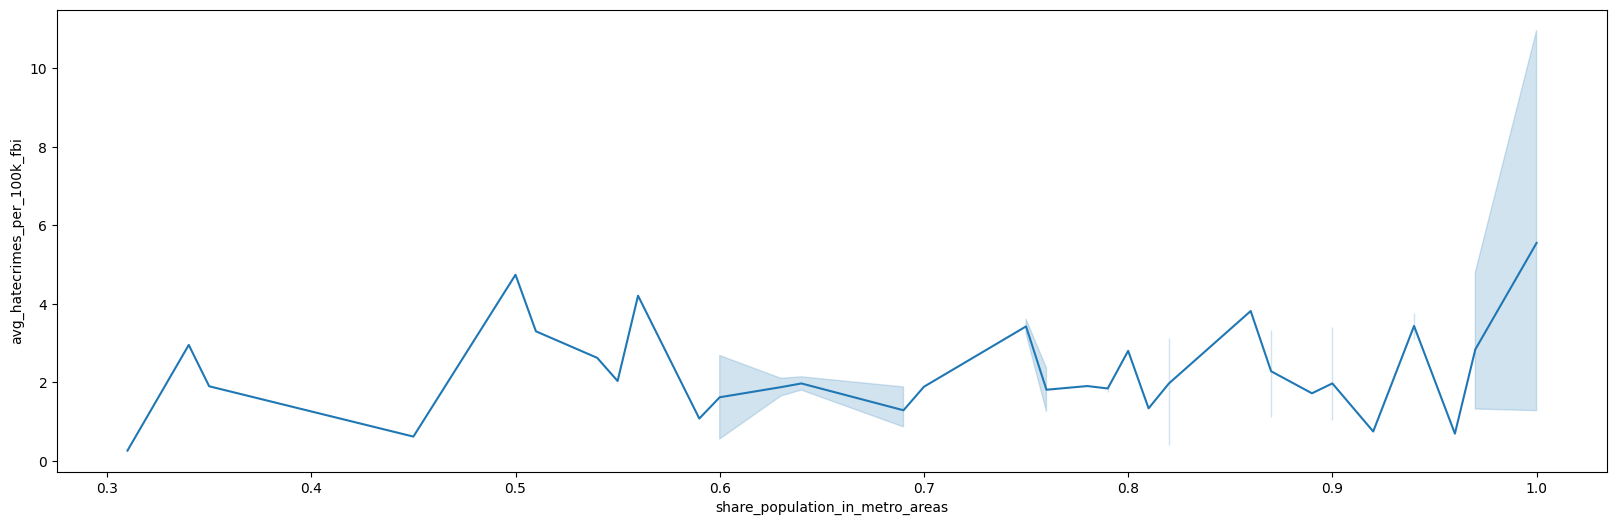

In [ ]:
plt.figure(figsize = (20,6))
sns.lineplot(x= df['share_population_in_metro_areas'],y = df['avg_hatecrimes_per_100k_fbi'], data = df3)

<Axes: xlabel='share_population_with_high_school_degree', ylabel='avg_hatecrimes_per_100k_fbi'>

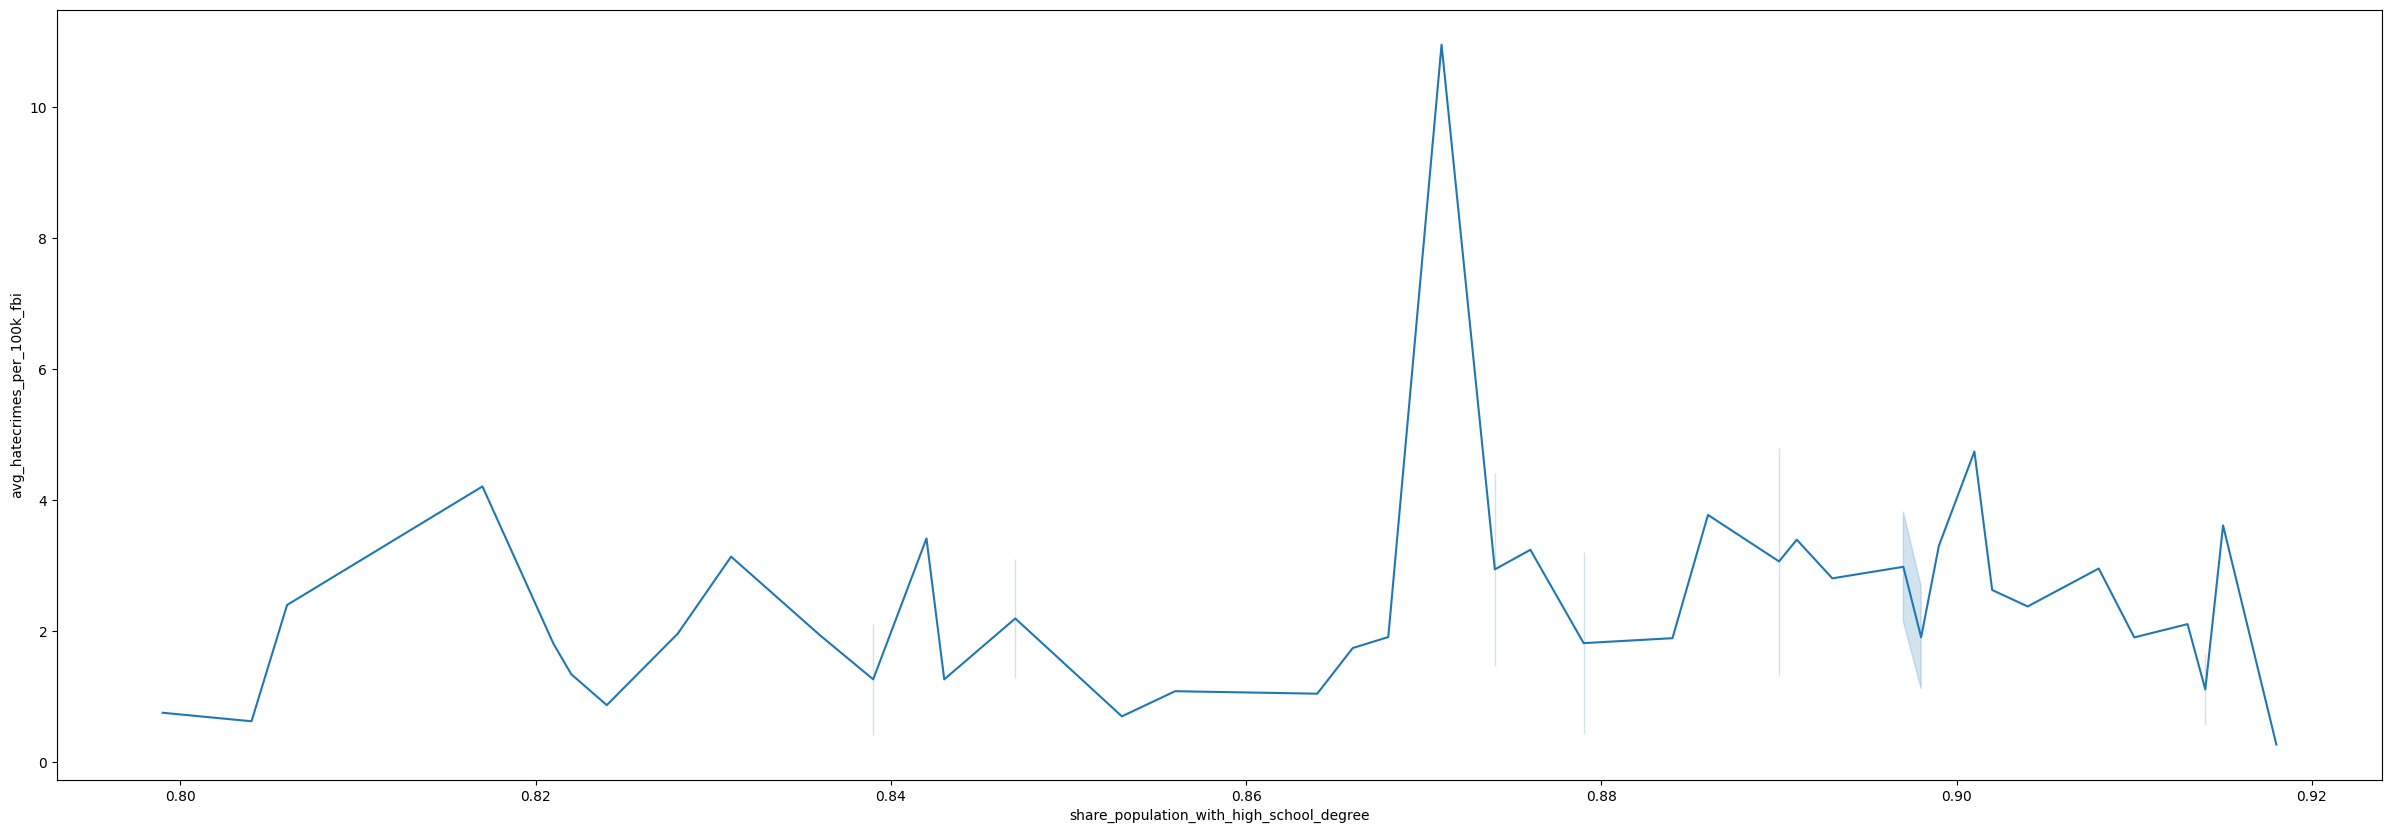

In [ ]:
plt.figure(figsize = (30,10))
sns.lineplot(x= df['share_population_with_high_school_degree'],y = df['avg_hatecrimes_per_100k_fbi'], data = df3)

<Axes: xlabel='share_non_citizen', ylabel='avg_hatecrimes_per_100k_fbi'>

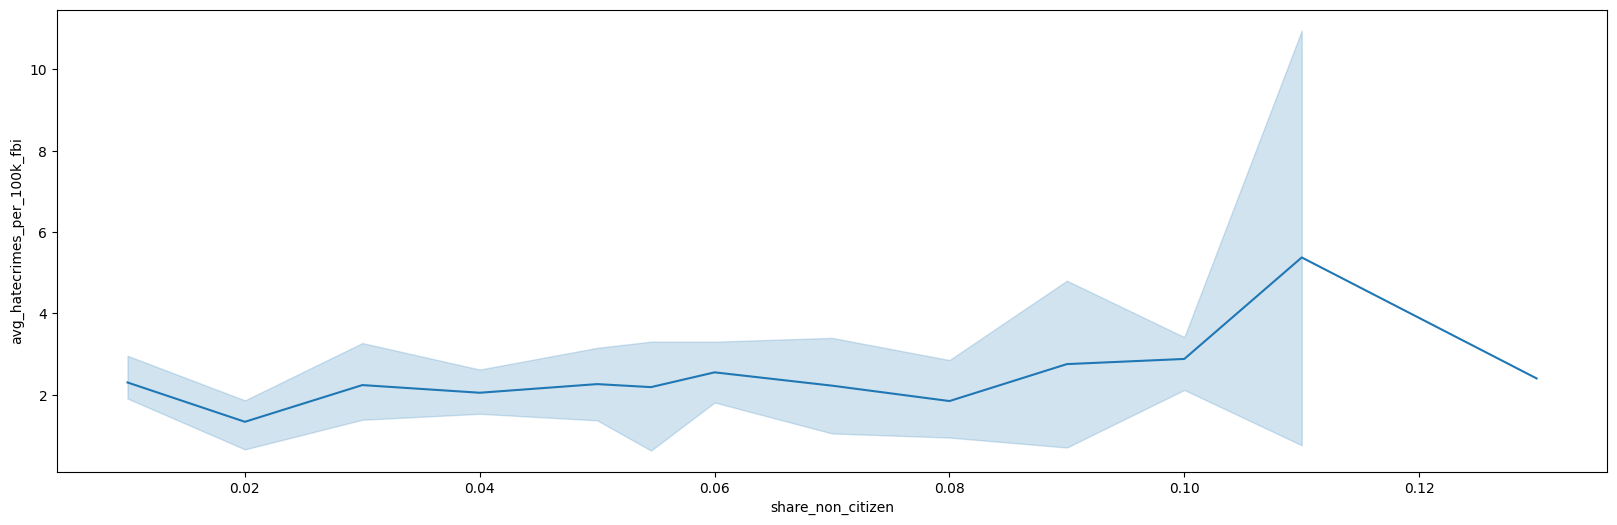

In [ ]:
plt.figure(figsize = (20,6))
sns.lineplot(x= df['share_non_citizen'],y = df['avg_hatecrimes_per_100k_fbi'], data = df3)

<Axes: xlabel='share_white_poverty', ylabel='avg_hatecrimes_per_100k_fbi'>

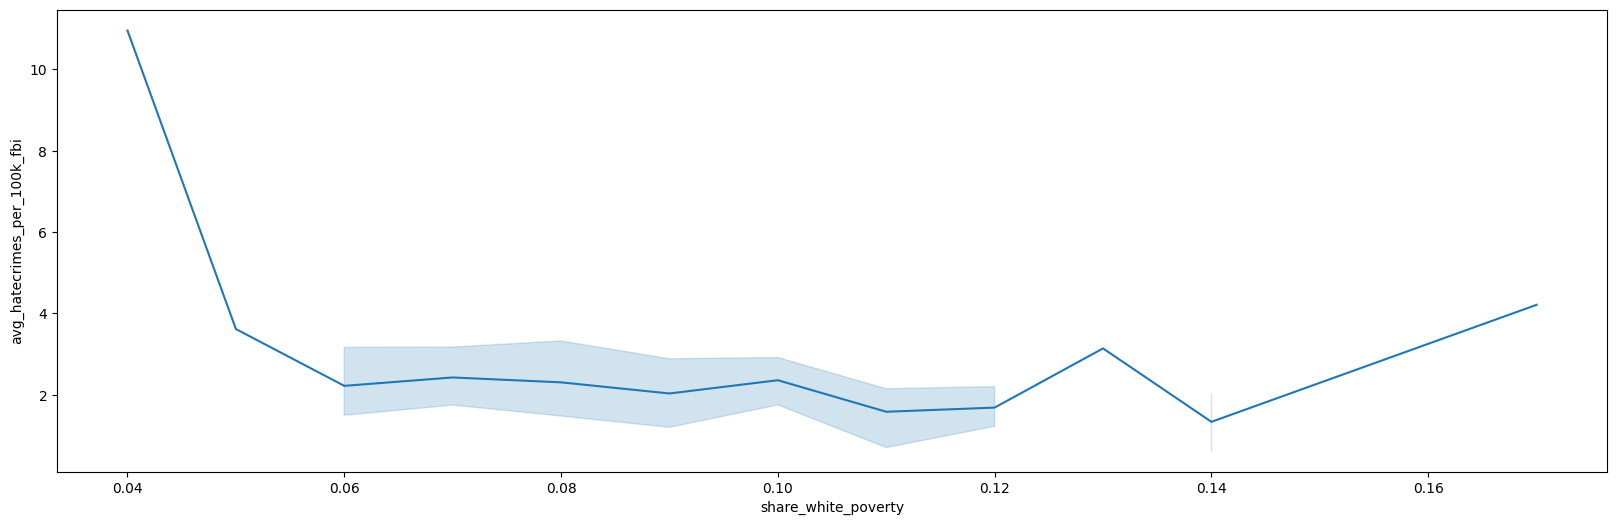

In [ ]:
plt.figure(figsize = (20,6))
sns.lineplot(x= df['share_white_poverty'],y = df['avg_hatecrimes_per_100k_fbi'], data = df3)

<Axes: xlabel='gini_index', ylabel='avg_hatecrimes_per_100k_fbi'>

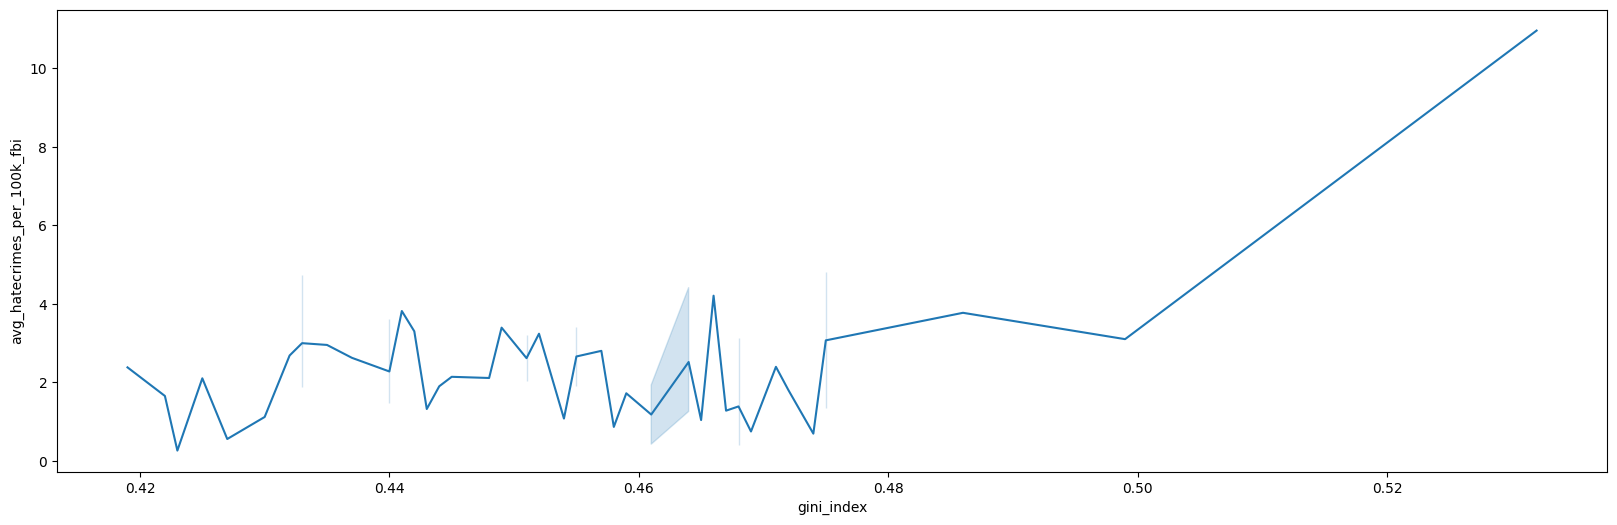

In [ ]:
plt.figure(figsize = (20,6))
sns.lineplot(x= df['gini_index'],y = df['avg_hatecrimes_per_100k_fbi'], data = df3)

<Axes: xlabel='share_non_white', ylabel='avg_hatecrimes_per_100k_fbi'>

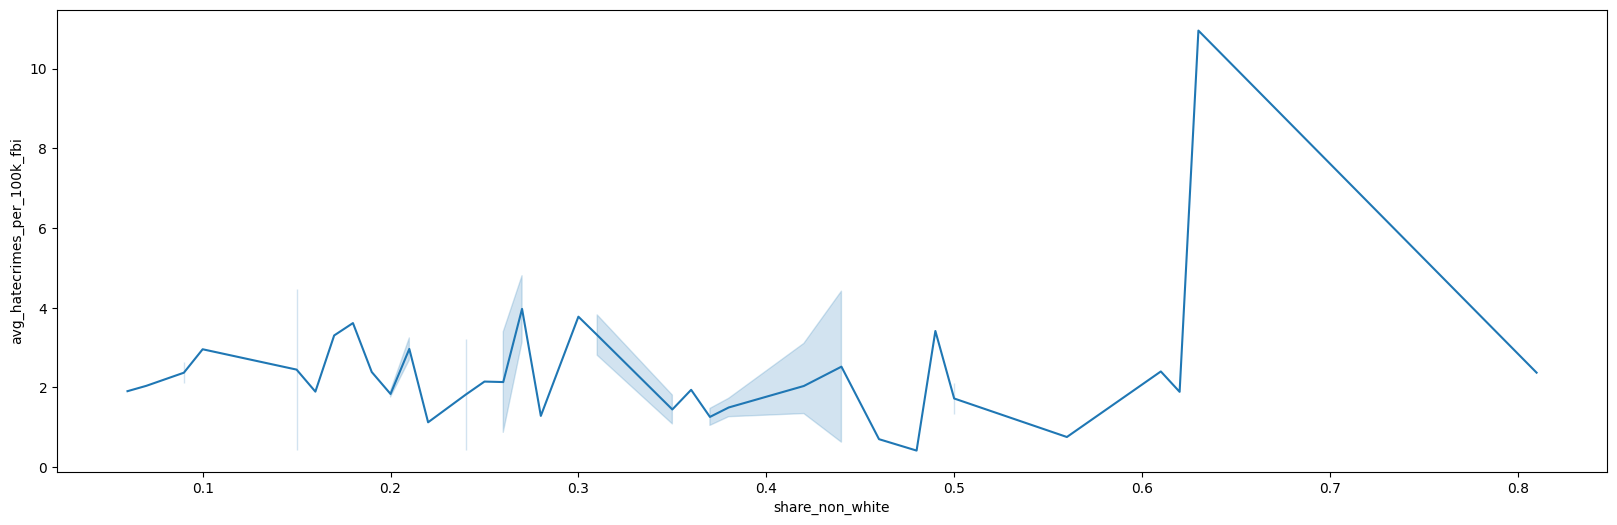

In [ ]:
plt.figure(figsize = (20,6))
sns.lineplot(x= df['share_non_white'],y = df['avg_hatecrimes_per_100k_fbi'], data = df3)

<Axes: xlabel='share_voters_voted_trump', ylabel='avg_hatecrimes_per_100k_fbi'>

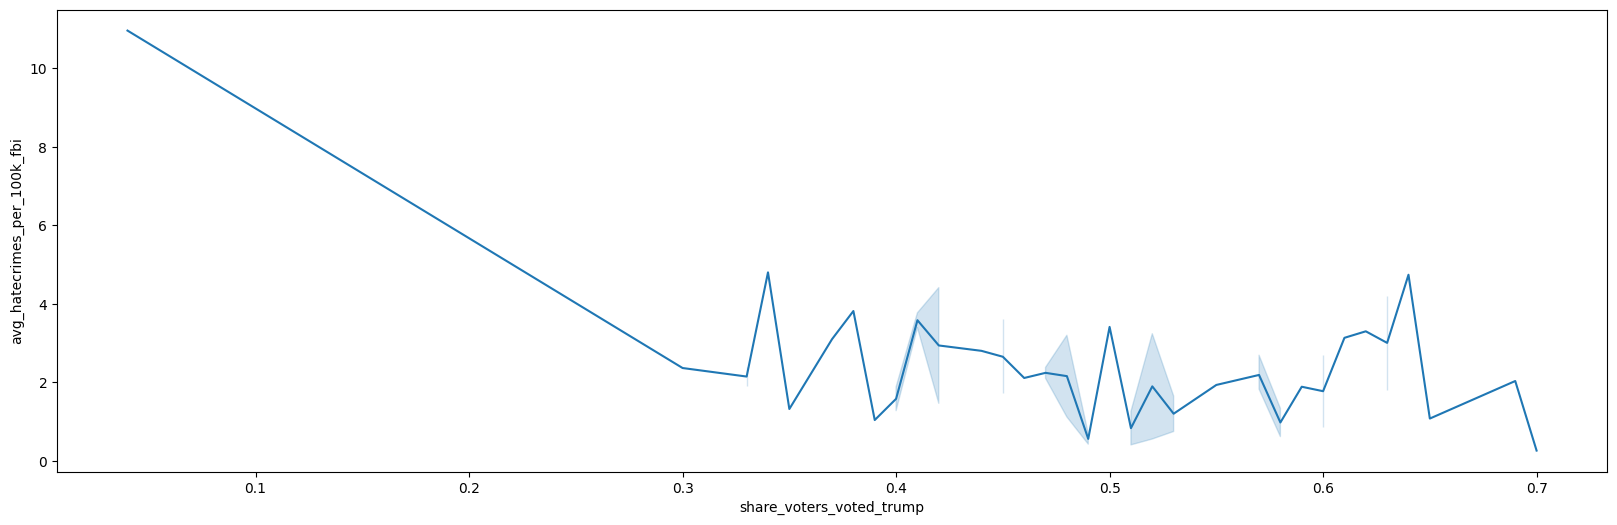

In [ ]:
plt.figure(figsize = (20,6))
sns.lineplot(x= df['share_voters_voted_trump'],y = df['avg_hatecrimes_per_100k_fbi'], data = df3)


In [ ]:
df_ind = df.drop(['state'],axis = 1)
df_ind.head()

median_household_income  share_unemployed_seasonal  \
0                    42278                      0.060   
1                    67629                      0.064   
2                    49254                      0.063   
3                    44922                      0.052   
4                    60487                      0.059   

   share_population_in_metro_areas  share_population_with_high_school_degree  \
0                             0.64                                     0.821   
1                             0.63                                     0.914   
2                             0.90                                     0.842   
3                             0.69                                     0.824   
4                             0.97                                     0.806   

   share_non_citizen  share_white_poverty  gini_index  share_non_white  \
0               0.02                 0.12       0.472             0.35   
1               0.04                 0.06       0.422             0.42   
2               0.10                 0.09       0.455             0.49   
3               0.04                 0.12       0.458             0.26   
4               0.13                 0.09       0.471             0.61   

   share_voters_voted_trump  hate_crimes_per_100k_splc  \
0                      0.63                   0.125839   
1                      0.53                   0.143740   
2                      0.50                   0.225320   
3                      0.60                   0.069061   
4                      0.33                   0.255805   

   avg_hatecrimes_per_100k_fbi  
0                     1.806410  
1                     1.656700  
2                     3.413928  
3                     0.869209  
4                     2.397986

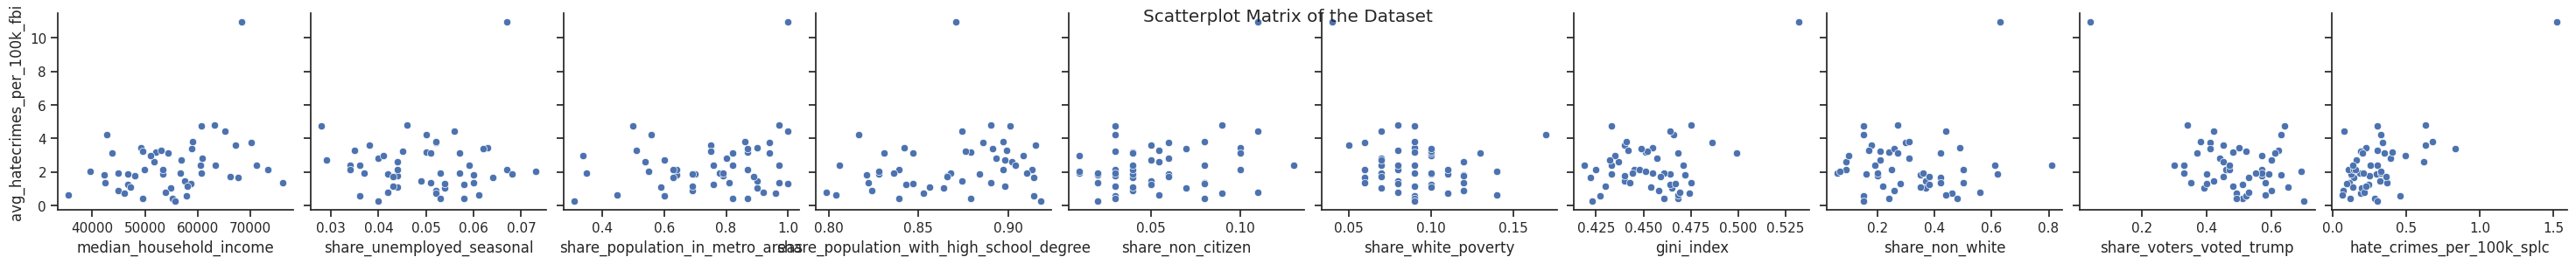

In [ ]:



sns.set(style="ticks")
sns.pairplot(df_ind, y_vars=['avg_hatecrimes_per_100k_fbi'], x_vars=df_ind.columns[:-1], height=3)


plt.suptitle('Scatterplot Matrix of the Dataset')


plt.show()


### Multivariate Analysis

### Pairplot

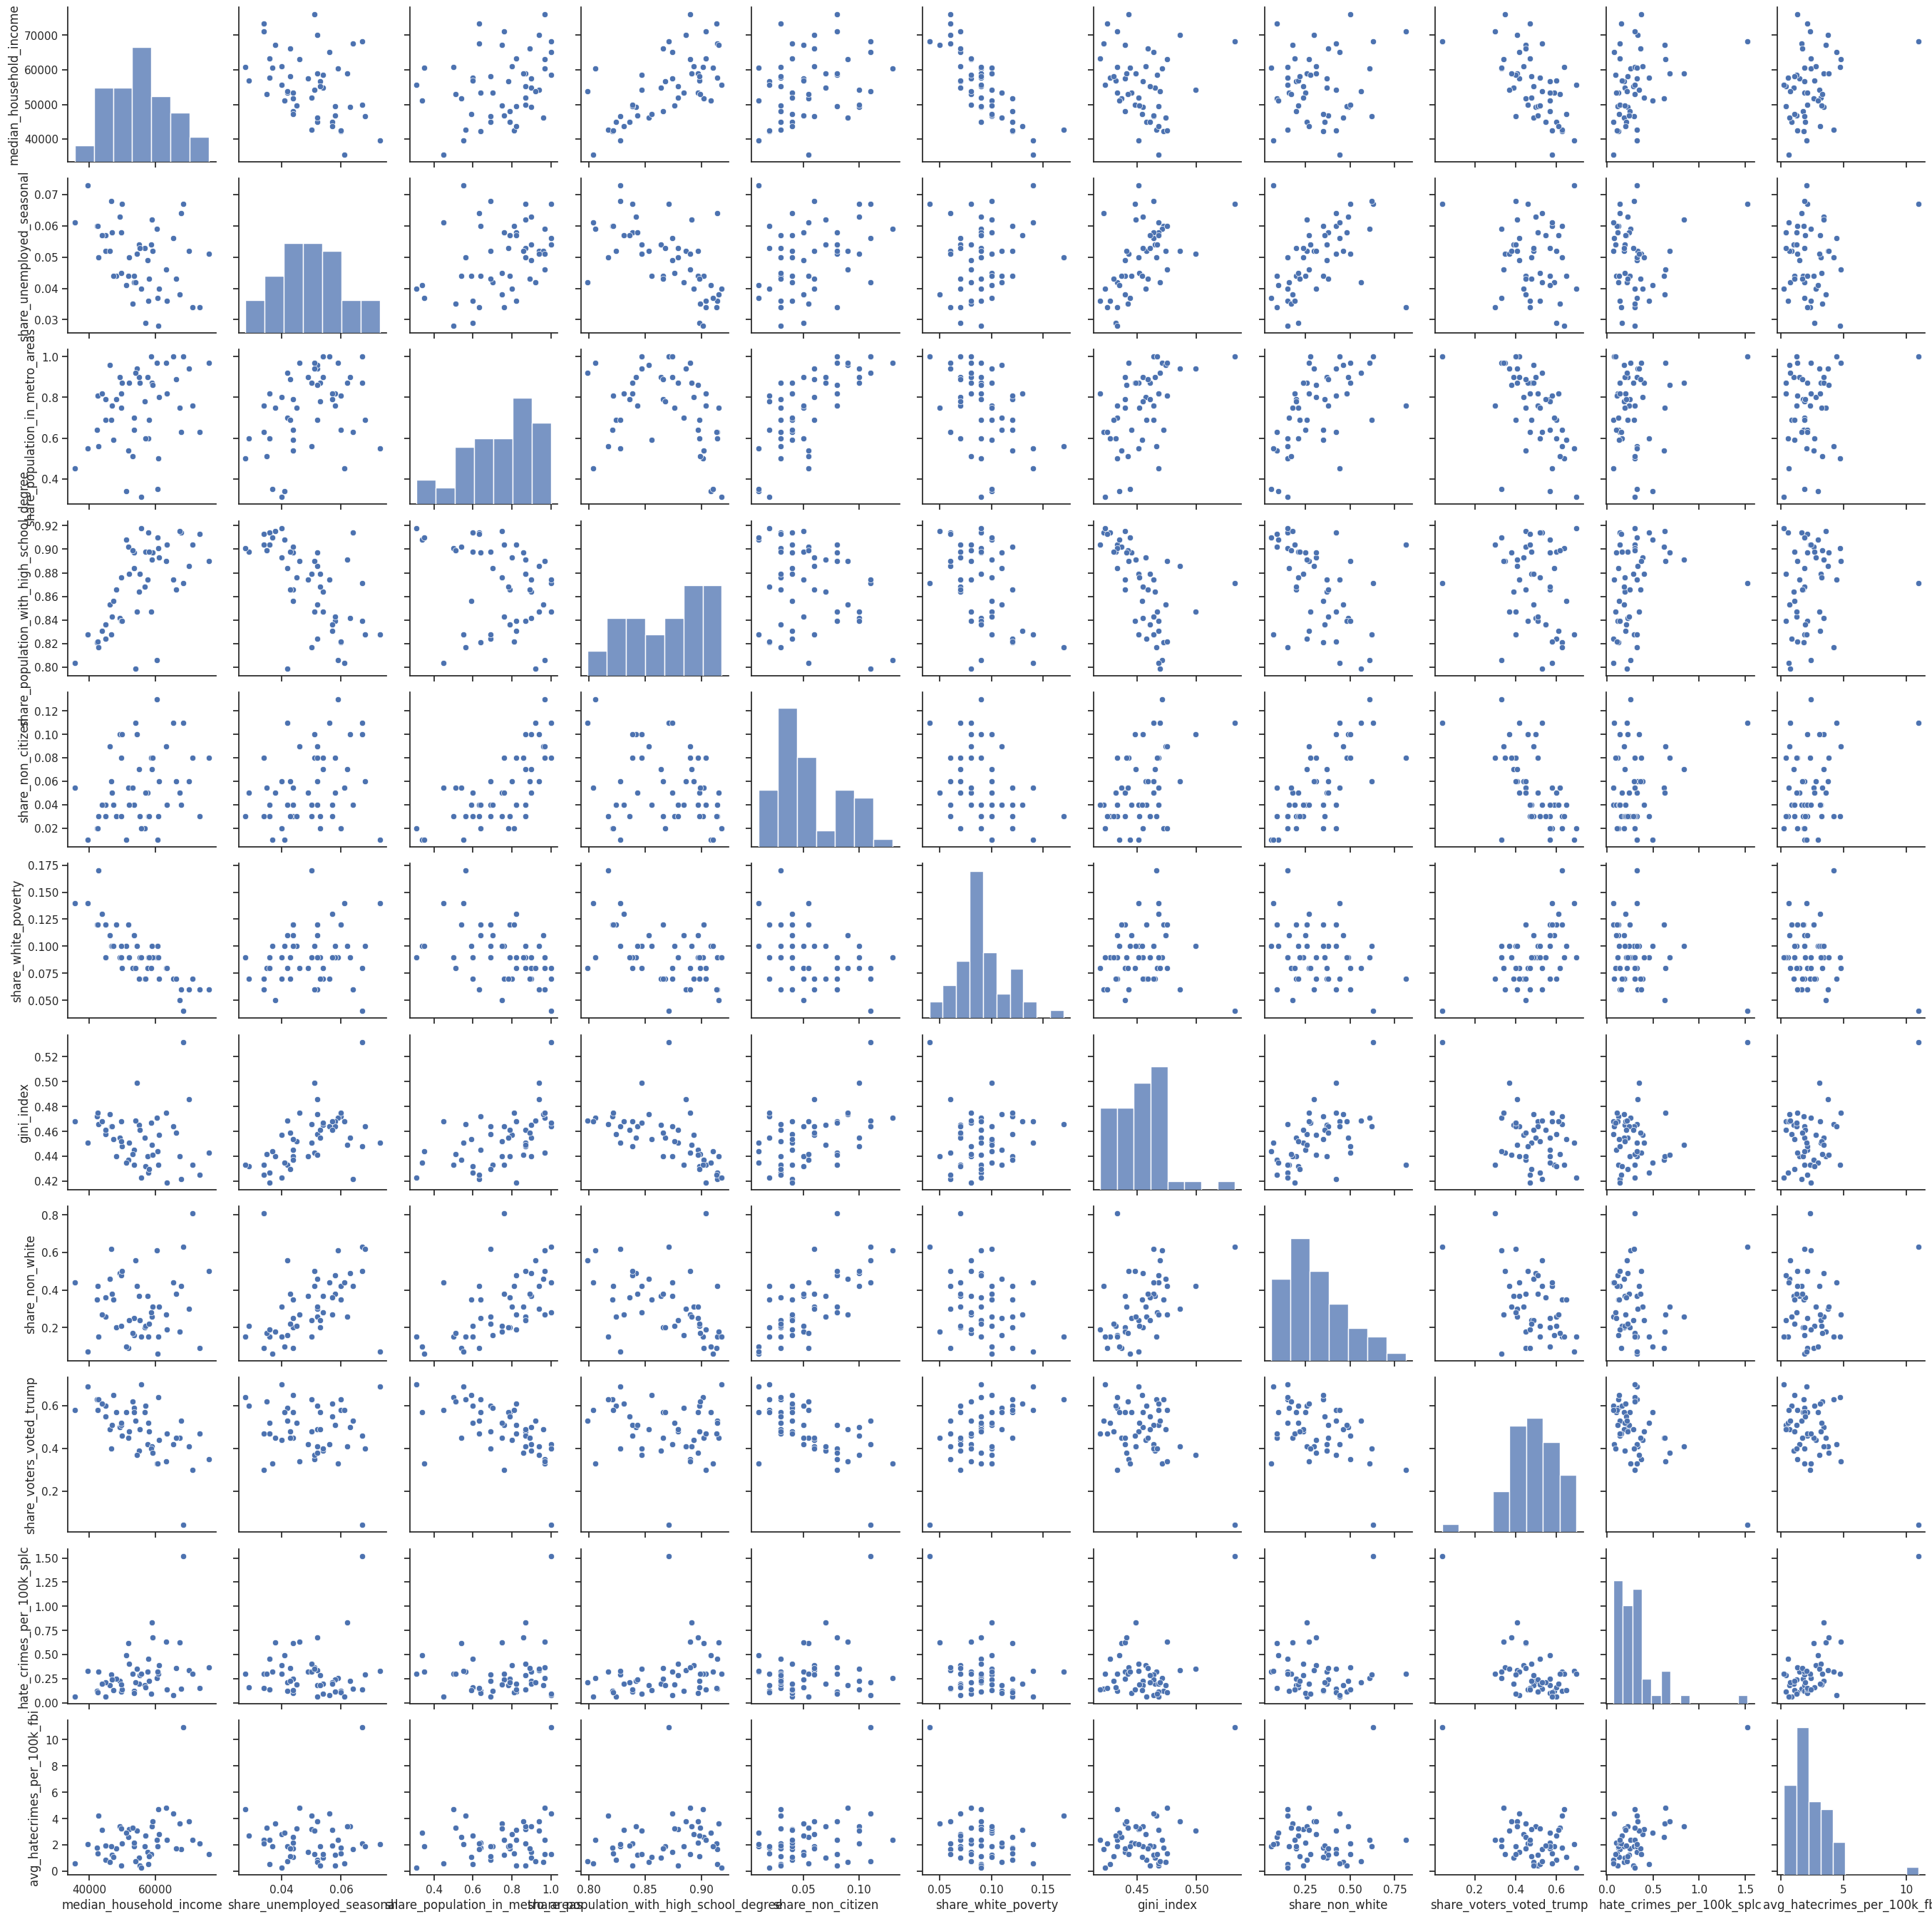

In [ ]:
pair = sns.PairGrid(df)
pair.map_diag(sns.histplot)
pair.map_offdiag(sns.scatterplot)
plt.show()


### We can see how the different variables vary with each other.

## Feature scaling

In [ ]:
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler().fit(df.iloc[:,1:-1])
df_minmax = minmax_scale.transform(df.iloc[:,1:-1])
df_minmax


array([[0.1662484 , 0.71111111, 0.47826087, 0.18487395, 0.08333333,
        0.61538462, 0.46902655, 0.38666667, 0.89393939],
       [0.7899813 , 0.8       , 0.46376812, 0.96638655, 0.25      ,
        0.15384615, 0.02654867, 0.48      , 0.74242424],
       [0.33788505, 0.77777778, 0.85507246, 0.36134454, 0.75      ,
        0.38461538, 0.31858407, 0.57333333, 0.6969697 ],
       [0.23130105, 0.53333333, 0.55072464, 0.21008403, 0.25      ,
        0.61538462, 0.34513274, 0.26666667, 0.84848485],
       [0.61426041, 0.68888889, 0.95652174, 0.05882353, 1.        ,
        0.38461538, 0.46017699, 0.73333333, 0.43939394],
       [0.62540596, 0.26666667, 0.71014493, 0.78991597, 0.41666667,
        0.23076923, 0.33628319, 0.33333333, 0.60606061],
       [0.85227832, 0.53333333, 0.91304348, 0.73109244, 0.41666667,
        0.15384615, 0.59292035, 0.32      , 0.56060606],
       [0.54130991, 0.46666667, 0.85507246, 0.6302521 , 0.33333333,
        0.30769231, 0.18584071, 0.41333333, 0.57575758],


In [ ]:
df.iloc[:,1:-1]

median_household_income  share_unemployed_seasonal  \
0                     42278                      0.060   
1                     67629                      0.064   
2                     49254                      0.063   
3                     44922                      0.052   
4                     60487                      0.059   
5                     60940                      0.040   
6                     70161                      0.052   
7                     57522                      0.049   
8                     68277                      0.067   
9                     46140                      0.052   
10                    49555                      0.058   
11                    71223                      0.034   
12                    53438                      0.042   
13                    54916                      0.054   
14                    48060                      0.044   
15                    57810                      0.036   
16                    53444                      0.044   
17                    42786                      0.050   
18                    42406                      0.060   
19                    51710                      0.044   
20                    76165                      0.051   
21                    63151                      0.046   
22                    52005                      0.050   
23                    67244                      0.038   
24                    35521                      0.061   
25                    56630                      0.053   
26                    51102                      0.041   
27                    56870                      0.029   
28                    49875                      0.067   
29                    73397                      0.034   
30                    65243                      0.056   
31                    46686                      0.068   
32                    54310                      0.051   
33                    46784                      0.058   
34                    60730                      0.028   
35                    49644                      0.045   
36                    47199                      0.044   
37                    58875                      0.062   
38                    55173                      0.053   
39                    58633                      0.054   
40                    44929                      0.057   
41                    53053                      0.035   
42                    43716                      0.057   
43                    53875                      0.042   
44                    63383                      0.036   
45                    60708                      0.037   
46                    66155                      0.043   
47                    59068                      0.052   
48                    39552                      0.073   
49                    58080                      0.043   
50                    55690                      0.040   

    share_population_in_metro_areas  share_population_with_high_school_degree  \
0                              0.64                                     0.821   
1                              0.63                                     0.914   
2                              0.90                                     0.842   
3                              0.69                                     0.824   
4                              0.97                                     0.806   
5                              0.80                                     0.893   
6                              0.94                                     0.886   
7                              0.90                                     0.874   
8                              1.00                                     0.871   
9                              0.96                                     0.853   
10                             0.82                                     0.839   
11             

In [ ]:
df_minmax.shape

(51, 9)

In [ ]:
df2 = pd.DataFrame(data = df_minmax, columns = ['median_household_income', 'share_unemployed_seasonal',
       'share_population_in_metro_areas',
       'share_population_with_high_school_degree', 'share_non_citizen',
       'share_white_poverty', 'gini_index', 'share_non_white',
       'share_voters_voted_trump'], index = df.index)



In [ ]:
df2.head()

median_household_income  share_unemployed_seasonal  \
0                 0.166248                   0.711111   
1                 0.789981                   0.800000   
2                 0.337885                   0.777778   
3                 0.231301                   0.533333   
4                 0.614260                   0.688889   

   share_population_in_metro_areas  share_population_with_high_school_degree  \
0                         0.478261                                  0.184874   
1                         0.463768                                  0.966387   
2                         0.855072                                  0.361345   
3                         0.550725                                  0.210084   
4                         0.956522                                  0.058824   

   share_non_citizen  share_white_poverty  gini_index  share_non_white  \
0           0.083333             0.615385    0.469027         0.386667   
1           0.250000             0.153846    0.026549         0.480000   
2           0.750000             0.384615    0.318584         0.573333   
3           0.250000             0.615385    0.345133         0.266667   
4           1.000000             0.384615    0.460177         0.733333   

   share_voters_voted_trump  
0                  0.893939  
1                  0.742424  
2                  0.696970  
3                  0.848485  
4                  0.439394

In [ ]:
df2.insert(0, column='state', value=df['state'])

In [ ]:
df2.insert(10, column = 'avg_hatecrimes_per_100k_fbi', value = df['avg_hatecrimes_per_100k_fbi'])

In [ ]:
df2.head()

state  median_household_income  share_unemployed_seasonal  \
0     Alabama                 0.166248                   0.711111   
1      Alaska                 0.789981                   0.800000   
2     Arizona                 0.337885                   0.777778   
3    Arkansas                 0.231301                   0.533333   
4  California                 0.614260                   0.688889   

   share_population_in_metro_areas  share_population_with_high_school_degree  \
0                         0.478261                                  0.184874   
1                         0.463768                                  0.966387   
2                         0.855072                                  0.361345   
3                         0.550725                                  0.210084   
4                         0.956522                                  0.058824   

   share_non_citizen  share_white_poverty  gini_index  share_non_white  \
0           0.083333             0.615385    0.469027         0.386667   
1           0.250000             0.153846    0.026549         0.480000   
2           0.750000             0.384615    0.318584         0.573333   
3           0.250000             0.615385    0.345133         0.266667   
4           1.000000             0.384615    0.460177         0.733333   

   share_voters_voted_trump  avg_hatecrimes_per_100k_fbi  
0                  0.893939                     1.806410  
1                  0.742424                     1.656700  
2                  0.696970                     3.413928  
3                  0.848485                     0.869209  
4                  0.439394                     2.397986

### Removing "State"

In [ ]:
df3=df2.drop('state',axis=1)

## Feature selection-Correlation

In [ ]:
df3.columns

Index(['median_household_income', 'share_unemployed_seasonal',
       'share_population_in_metro_areas',
       'share_population_with_high_school_degree', 'share_non_citizen',
       'share_white_poverty', 'gini_index', 'share_non_white',
       'share_voters_voted_trump', 'avg_hatecrimes_per_100k_fbi'],
      dtype='object')

In [ ]:
x=df3.drop('avg_hatecrimes_per_100k_fbi',axis=1)
x.head()

median_household_income  share_unemployed_seasonal  \
0                 0.166248                   0.711111   
1                 0.789981                   0.800000   
2                 0.337885                   0.777778   
3                 0.231301                   0.533333   
4                 0.614260                   0.688889   

   share_population_in_metro_areas  share_population_with_high_school_degree  \
0                         0.478261                                  0.184874   
1                         0.463768                                  0.966387   
2                         0.855072                                  0.361345   
3                         0.550725                                  0.210084   
4                         0.956522                                  0.058824   

   share_non_citizen  share_white_poverty  gini_index  share_non_white  \
0           0.083333             0.615385    0.469027         0.386667   
1           0.250000             0.153846    0.026549         0.480000   
2           0.750000             0.384615    0.318584         0.573333   
3           0.250000             0.615385    0.345133         0.266667   
4           1.000000             0.384615    0.460177         0.733333   

   share_voters_voted_trump  
0                  0.893939  
1                  0.742424  
2                  0.696970  
3                  0.848485  
4                  0.439394

In [ ]:
y=df3['avg_hatecrimes_per_100k_fbi']
y.head()

0    1.806410
1    1.656700
2    3.413928
3    0.869209
4    2.397986
Name: avg_hatecrimes_per_100k_fbi, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape,x_test.shape

((38, 9), (13, 9))

In [ ]:
y_train,y_test

(35     3.240420
 34     4.741070
 7      1.469980
 14     1.757357
 46     1.724755
 18     1.341170
 48     2.037054
 42     3.136051
 15     0.561396
 31     1.886435
 30     4.413203
 16     2.143987
 43     0.752768
 20     1.324840
 50     0.266941
 8     10.953480
 13     1.044016
 25     1.908955
 5      2.804689
 17     4.207890
 37     3.394886
 40     1.937083
 1      1.656700
 12     1.891331
 38     0.430928
 24     0.622746
 6      3.772701
 23     3.612412
 36     1.081672
 21     4.801899
 19     2.626611
 9      0.698070
 39     1.282572
 49     1.121945
 3      0.869209
 0      1.806410
 47     3.817740
 44     2.384065
 Name: avg_hatecrimes_per_100k_fbi, dtype: float64,
 29    2.105989
 11    2.367613
 10    0.412012
 22    3.200442
 2     3.413928
 28    2.113990
 45    1.903081
 32    3.102164
 26    2.954959
 4     2.397986
 33    1.262680
 41    3.301737
 27    2.686248
 Name: avg_hatecrimes_per_100k_fbi, dtype: float64)

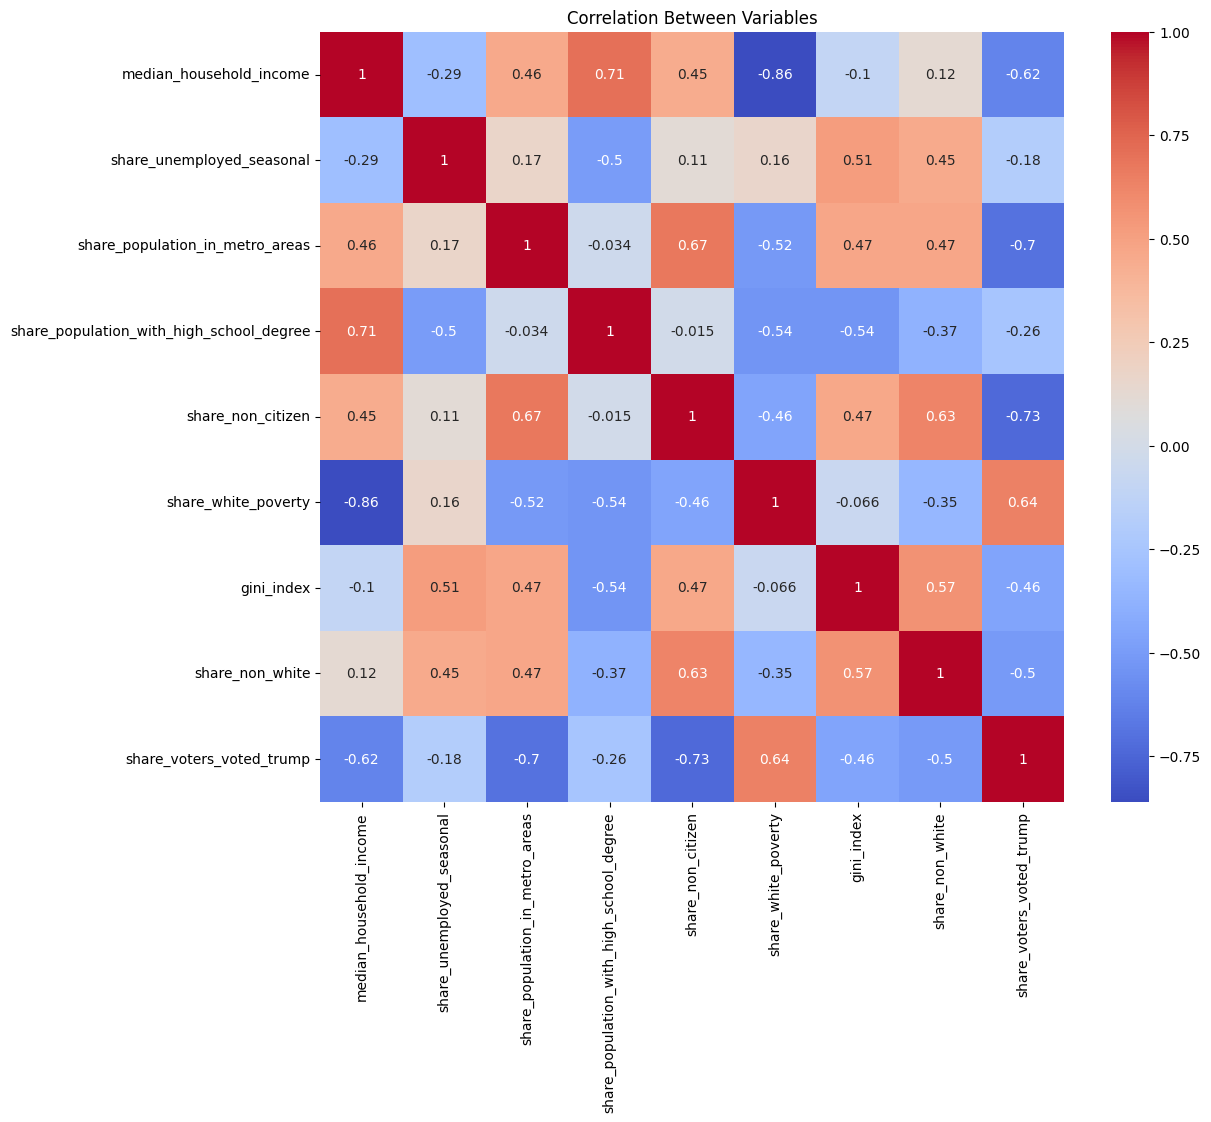

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()


In [ ]:
x_train.corr()

median_household_income  \
median_household_income                                  1.000000   
share_unemployed_seasonal                               -0.294777   
share_population_in_metro_areas                          0.458576   
share_population_with_high_school_degree                 0.708553   
share_non_citizen                                        0.446667   
share_white_poverty                                     -0.860583   
gini_index                                              -0.103972   
share_non_white                                          0.124186   
share_voters_voted_trump                                -0.617779   

                                          share_unemployed_seasonal  \
median_household_income                                   -0.294777   
share_unemployed_seasonal                                  1.000000   
share_population_in_metro_areas                            0.166696   
share_population_with_high_school_degree                  -0.501867   
share_non_citizen                                          0.107828   
share_white_poverty                                        0.160554   
gini_index                                                 0.513180   
share_non_white                                            0.448744   
share_voters_voted_trump                                  -0.184753   

                                          share_population_in_metro_areas  \
median_household_income                                          0.458576   
share_unemployed_seasonal                                        0.166696   
share_population_in_metro_areas                                  1.000000   
share_population_with_high_school_degree                        -0.033604   
share_non_citizen                                                0.673059   
share_white_poverty                                             -0.516414   
gini_index                                                       0.474558   
share_non_white                                                  0.472881   
share_voters_voted_trump                                        -0.696767   

                                          share_population_with_high_school_degree  \
median_household_income                                                   0.708553   
share_unemployed_seasonal                                                -0.501867   
share_population_in_metro_areas                                          -0.033604   
share_population_with_high_school_degree                                  1.000000   
share_non_citizen                                                        -0.014693   
share_white_poverty                                                      -0.537194   
gini_index                                                               -0.536773   
share_non_white                                                          -0.374449   
share_voters_voted_trump                                                 -0.256640   

                                          share_non_citizen  \
median_household_income                            0.446667   
share_unemployed_seasonal                          0.107828   
share_population_in_metro_areas                    0.673059   
share_population_with_high_school_degree          -0.014693   
share_non_citizen                                  1.000000   
share_white_poverty                               -0.459920   
gini_index                                         0.467440   
share_non_white                                    0.625201   
share_voters_voted_trump                          -0.734522   

                                          share_white_poverty  gini_index  \
median_household_income                             -0.860583   -0.103972   
share_unemployed_seasonal                            0.160554    0.513180   
share_population_in_metro_areas                     -0.516414    0.474558   
share_population_with_high_school_degree            -0.537194   -0.53

In [ ]:
def correlation(dataset,threshold):
    col_corr=[]
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.append(colname)
    return col_corr

In [ ]:
corr_features=correlation(x_train,0.8)


In [ ]:
corr_features

['share_white_poverty']

In [ ]:
x_train.drop(corr_features,axis=1)


median_household_income  share_unemployed_seasonal  \
35                 0.347481                   0.377778   
34                 0.620239                   0.000000   
7                  0.541310                   0.466667   
14                 0.308508                   0.355556   
46                 0.753715                   0.333333   
18                 0.169398                   0.711111   
48                 0.099178                   1.000000   
42                 0.201629                   0.644444   
15                 0.548396                   0.177778   
31                 0.274702                   0.888889   
30                 0.731276                   0.622222   
16                 0.440975                   0.355556   
43                 0.451580                   0.311111   
20                 1.000000                   0.511111   
50                 0.496236                   0.266667   
8                  0.805925                   0.866667   
13                 0.477192                   0.577778   
25                 0.519363                   0.555556   
5                  0.625406                   0.266667   
17                 0.178747                   0.488889   
37                 0.574599                   0.755556   
40                 0.231473                   0.644444   
1                  0.789981                   0.800000   
12                 0.440828                   0.311111   
38                 0.483515                   0.555556   
24                 0.000000                   0.733333   
6                  0.852278                   0.533333   
23                 0.780509                   0.222222   
36                 0.287324                   0.355556   
21                 0.679805                   0.400000   
19                 0.398312                   0.355556   
9                  0.261269                   0.533333   
39                 0.568645                   0.577778   
49                 0.555039                   0.333333   
3                  0.231301                   0.533333   
0                  0.166248                   0.711111   
47                 0.579348                   0.533333   
44                 0.685513                   0.177778   

    share_population_in_metro_areas  share_population_with_high_school_degree  \
35                         0.637681                                  0.647059   
34                         0.275362                                  0.857143   
7                          0.855072                                  0.630252   
14                         0.695652                                  0.563025   
46                         0.840580                                  0.563025   
18                         0.724638                                  0.193277   
48                         0.347826                                  0.243697   
42                         0.739130                                  0.268908   
15                         0.420290                                  0.966387   
31                         0.550725                                  0.243697   
30                         1.000000                                  0.630252   
16                         0.478261                                  0.823529   
43                         0.884058                                  0.000000   
20                         0.956522                                  0.764706   
50                         0.000000                                  1.000000   
8                          1.000000                                  0.605042   
13                         0.855072                                  0.546218   
25                         0.681159                                  0.579832   
5                          0.710145                                  0.789916   
17                         0.362319                                  0.151261   
37                         0.811594     

In [ ]:
x_test.drop(corr_features,axis=1)

median_household_income  share_unemployed_seasonal  \
29                 0.931896                   0.133333   
11                 0.878408                   0.133333   
10                 0.345291                   0.666667   
22                 0.405570                   0.488889   
2                  0.337885                   0.777778   
28                 0.353164                   0.866667   
45                 0.619698                   0.200000   
32                 0.462282                   0.511111   
26                 0.383353                   0.288889   
4                  0.614260                   0.688889   
33                 0.277113                   0.666667   
41                 0.431355                   0.155556   
27                 0.525268                   0.022222   

    share_population_in_metro_areas  share_population_with_high_school_degree  \
29                         0.463768                                  0.957983   
11                         0.652174                                  0.882353   
10                         0.739130                                  0.336134   
22                         0.811594                                  0.672269   
2                          0.855072                                  0.361345   
28                         0.811594                                  0.336134   
45                         0.057971                                  0.932773   
32                         0.913043                                  0.403361   
26                         0.043478                                  0.915966   
4                          0.956522                                  0.058824   
33                         0.652174                                  0.369748   
41                         0.289855                                  0.840336   
27                         0.420290                                  0.831933   

    share_non_citizen  gini_index  share_non_white  share_voters_voted_trump  
29           0.166667    0.053097         0.040000                  0.651515  
11           0.583333    0.123894         1.000000                  0.393939  
10           0.583333    0.433628         0.560000                  0.712121  
22           0.250000    0.283186         0.240000                  0.666667  
2            0.750000    0.318584         0.573333                  0.696970  
28           0.750000    0.256637         0.586667                  0.636364  
45           0.000000    0.221239         0.000000                  0.439394  
32           0.750000    0.707965         0.480000                  0.500000  
26           0.000000    0.141593         0.053333                  0.803030  
4            1.000000    0.460177         0.733333                  0.439394  
33           0.333333    0.398230         0.426667                  0.712121  
41           0.371528    0.203540         0.146667                  0.878788  
27           0.333333    0.115044         0.200000                  0.848485

In [ ]:
from sklearn.linear_model import LinearRegression
lireg = LinearRegression()
lireg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_lipred = lireg.predict(x_test)

In [ ]:
y_lipred

array([3.18563331, 1.93020169, 1.52547883, 1.73024421, 0.41885153,
       0.09347895, 6.18620121, 5.13894417, 2.91956172, 2.75173044,
       1.7499096 , 1.88823191, 0.95042636])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_lipred)
r2 = r2_score(y_test, y_lipred)

In [ ]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.513818847134096
R-squared: -4.060548158524355


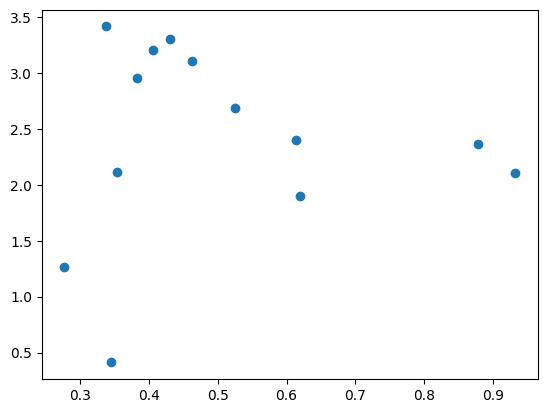

In [ ]:
plt.scatter(x_test['median_household_income'],y_test)

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
regressors = LazyRegressor(ignore_warnings=True, custom_metric=None)

models, predictions = regressors.fit(x_train, x_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:01<00:00, 35.19it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
KNeighborsRegressor                         -3.13      -0.03  0.11        0.01
QuantileRegressor                           -3.24      -0.06  0.11        0.03
GammaRegressor                              -3.61      -0.15  0.11        0.01
LGBMRegressor                               -3.83      -0.21  0.12        0.01
Lasso                                       -3.83      -0.21  0.12        0.01
DummyRegressor                              -3.83      -0.21  0.12        0.01
ElasticNet                                  -3.83      -0.21  0.12        0.01
HistGradientBoostingRegressor               -3.83      -0.21  0.12        0.05
LassoLars                                   -3.83      -0.21  0.12        0.01
SGDRegressor                                -4.72      -0.43  0.13        0.01
PoissonRegressor                            -5.06   

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv1 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv1)

array([-3.90192059, -0.37287949, -0.37363601, -0.52657025,  0.2515453 ])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {

            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10,20,30]

            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

model  best_score  \
0  linear_regression   -0.984692   
1      decision_tree   -1.492943   
2      random_forest   -0.393935   

                                         best_params  
0                                                 {}  
1  {'criterion': 'friedman_mse', 'splitter': 'best'}  
2                               {'n_estimators': 20}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


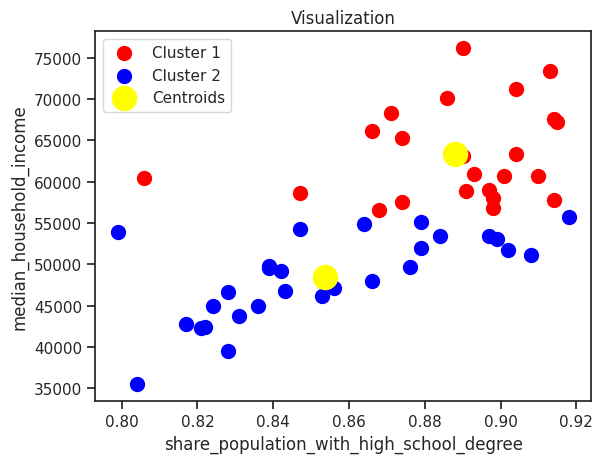

In [ ]:
from sklearn.cluster import KMeans
X =  df[['share_population_with_high_school_degree','median_household_income']]
X=np.array(X)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
df['cluster'] = kmeans.labels_
plt.scatter(X[kmeans.labels_ == 0, 0], X[kmeans.labels_ == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[kmeans.labels_ == 1, 0], X[kmeans.labels_ == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Visualization')
plt.xlabel('share_population_with_high_school_degree')
plt.ylabel('median_household_income')
plt.legend()
plt.show()

In [ ]:
df4 = df.drop(['state','avg_hatecrimes_per_100k_fbi'],axis = 1)

In [ ]:
df4

median_household_income  share_unemployed_seasonal  \
0                     42278                      0.060   
1                     67629                      0.064   
2                     49254                      0.063   
3                     44922                      0.052   
4                     60487                      0.059   
5                     60940                      0.040   
6                     70161                      0.052   
7                     57522                      0.049   
8                     68277                      0.067   
9                     46140                      0.052   
10                    49555                      0.058   
11                    71223                      0.034   
12                    53438                      0.042   
13                    54916                      0.054   
14                    48060                      0.044   
15                    57810                      0.036   
16                    53444                      0.044   
17                    42786                      0.050   
18                    42406                      0.060   
19                    51710                      0.044   
20                    76165                      0.051   
21                    63151                      0.046   
22                    52005                      0.050   
23                    67244                      0.038   
24                    35521                      0.061   
25                    56630                      0.053   
26                    51102                      0.041   
27                    56870                      0.029   
28                    49875                      0.067   
29                    73397                      0.034   
30                    65243                      0.056   
31                    46686                      0.068   
32                    54310                      0.051   
33                    46784                      0.058   
34                    60730                      0.028   
35                    49644                      0.045   
36                    47199                      0.044   
37                    58875                      0.062   
38                    55173                      0.053   
39                    58633                      0.054   
40                    44929                      0.057   
41                    53053                      0.035   
42                    43716                      0.057   
43                    53875                      0.042   
44                    63383                      0.036   
45                    60708                      0.037   
46                    66155                      0.043   
47                    59068                      0.052   
48                    39552                      0.073   
49                    58080                      0.043   
50                    55690                      0.040   

    share_population_in_metro_areas  share_population_with_high_school_degree  \
0                              0.64                                     0.821   
1                              0.63                                     0.914   
2                              0.90                                     0.842   
3                              0.69                                     0.824   
4                              0.97                                     0.806   
5                              0.80                                     0.893   
6                              0.94                                     0.886   
7                              0.90                                     0.874   
8                              1.00                                     0.871   
9                              0.96                                     0.853   
10                             0.82                                     0.839   
11             

**K MEANS CLUSTERING**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

**finding optimal k**

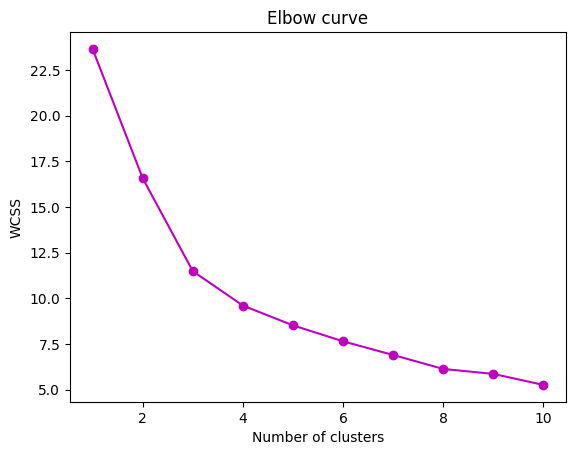

In [ ]:
plt.plot(range(1, 11), wcss, color = 'm',marker = 'o')
plt.title('Elbow curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

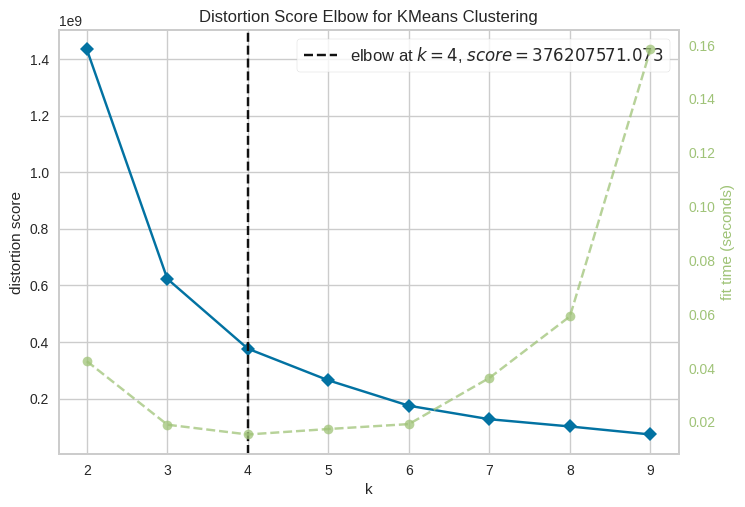

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(df4)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_scores.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

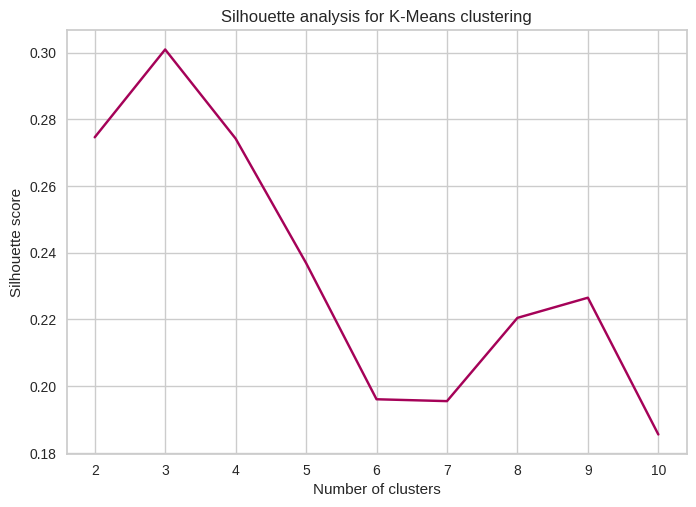

In [ ]:
plt.plot(range(2, 11), silhouette_scores, color = 'm')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for K-Means clustering')
plt.show()

In [ ]:
best_k = silhouette_scores.index(max(silhouette_scores)) + 2 # Add 2 because range started at 2
print("No of clusters: ",best_k)

# Train the K-Means model with the optimal k value
kmeans = KMeans(n_clusters=best_k, random_state=0).fit(df4)

# Print the cluster labels
print("Cluster labels:", kmeans.labels_)


No of clusters:  3
Cluster labels: [2 0 2 2 1 1 0 1 0 2 2 0 1 1 2 1 1 2 2 1 0 0 1 0 2 1 1 1 2 0 0 2 1 2 1 2 2
 1 1 1 2 1 2 1 0 1 0 1 2 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_predict= kmeans.fit_predict(df4)
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0,
       1, 0, 2, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       0, 1, 0, 1, 2, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import pairwise_distances
cluster_distance_matrix = pairwise_distances(df4, metric='euclidean')

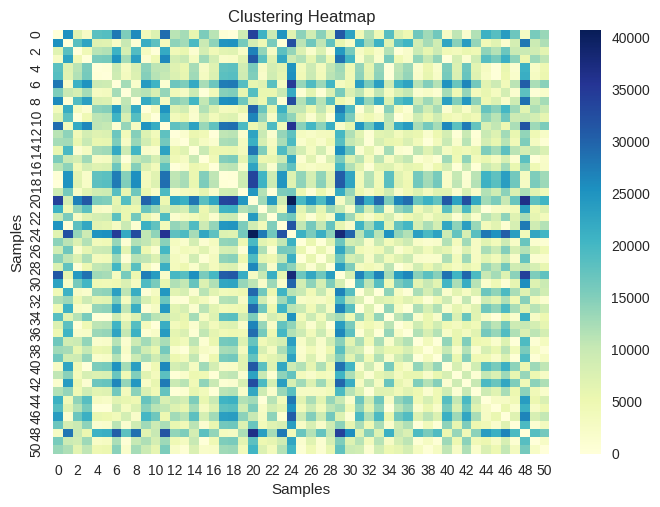

In [ ]:
sns.heatmap(cluster_distance_matrix, cmap="YlGnBu")
plt.title('Clustering Heatmap')
plt.xlabel('Samples')
plt.ylabel('Samples')
plt.show()

In [ ]:
X = x.values
X

array([[0.1662484 , 0.71111111, 0.47826087, 0.18487395, 0.08333333,
        0.61538462, 0.46902655, 0.38666667, 0.89393939],
       [0.7899813 , 0.8       , 0.46376812, 0.96638655, 0.25      ,
        0.15384615, 0.02654867, 0.48      , 0.74242424],
       [0.33788505, 0.77777778, 0.85507246, 0.36134454, 0.75      ,
        0.38461538, 0.31858407, 0.57333333, 0.6969697 ],
       [0.23130105, 0.53333333, 0.55072464, 0.21008403, 0.25      ,
        0.61538462, 0.34513274, 0.26666667, 0.84848485],
       [0.61426041, 0.68888889, 0.95652174, 0.05882353, 1.        ,
        0.38461538, 0.46017699, 0.73333333, 0.43939394],
       [0.62540596, 0.26666667, 0.71014493, 0.78991597, 0.41666667,
        0.23076923, 0.33628319, 0.33333333, 0.60606061],
       [0.85227832, 0.53333333, 0.91304348, 0.73109244, 0.41666667,
        0.15384615, 0.59292035, 0.32      , 0.56060606],
       [0.54130991, 0.46666667, 0.85507246, 0.6302521 , 0.33333333,
        0.30769231, 0.18584071, 0.41333333, 0.57575758],


In [ ]:

from pandas.plotting import parallel_coordinates



df_cluster = pd.DataFrame(x, columns=['median_household_income', 'share_unemployed_seasonal','share_population_in_metro_areas','share_population_with_high_school_degree', 'share_non_citizen','share_white_poverty', 'gini_index', 'share_non_white','share_voters_voted_trump'])
df_cluster['Cluster'] = kmeans.labels_



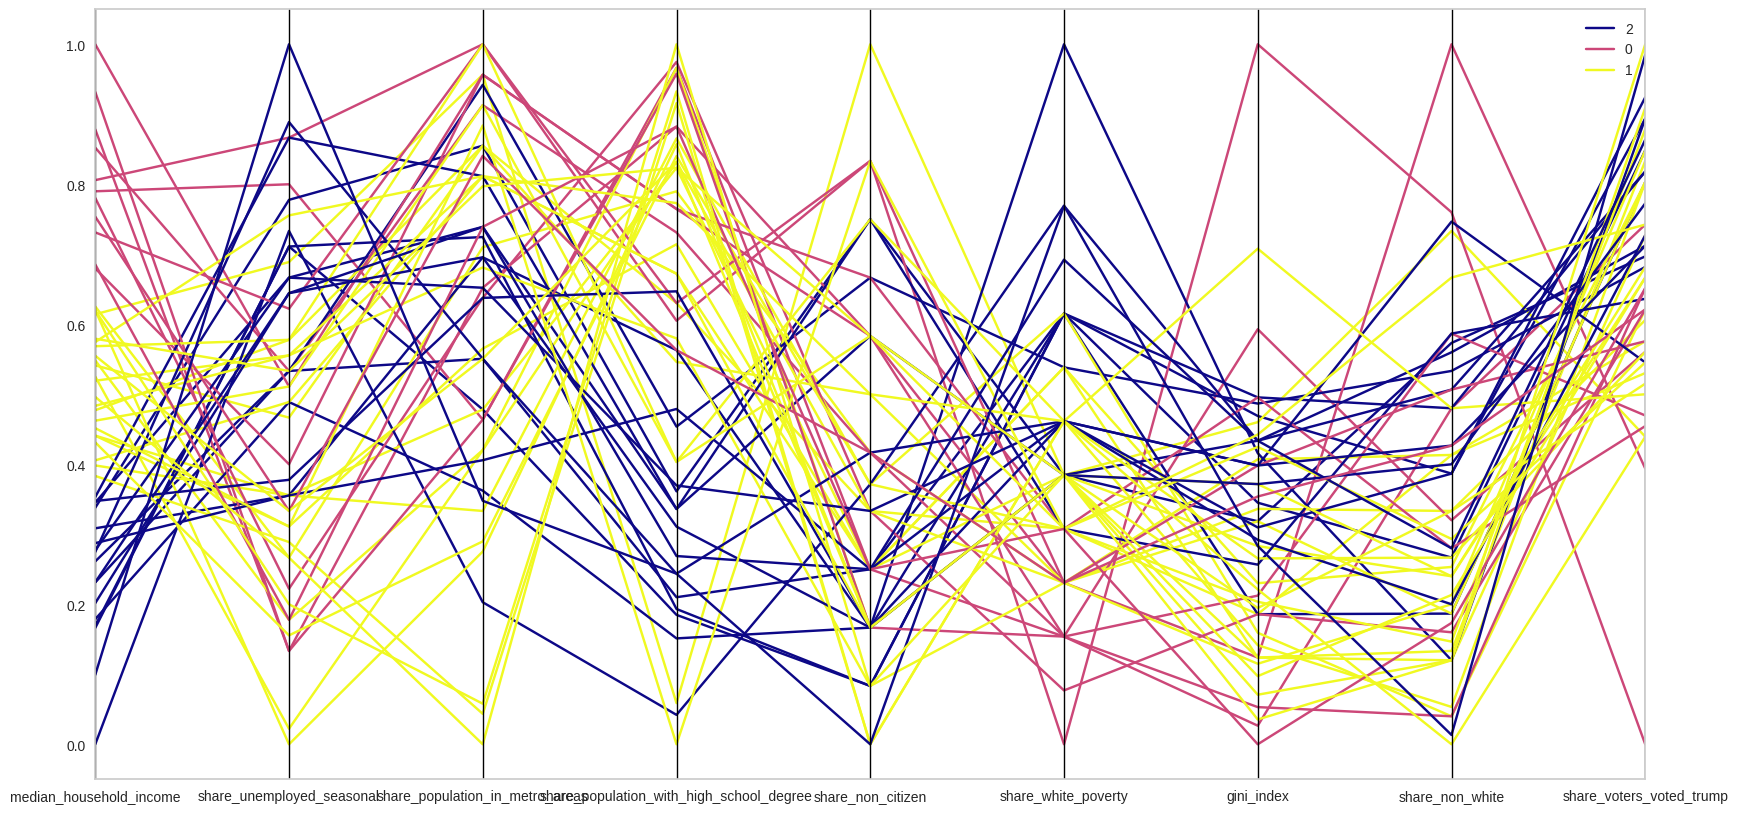

In [ ]:
plt.figure(figsize=(20,10))
parallel_coordinates(df_cluster, 'Cluster', colormap='plasma')
plt.show()

In [ ]:
df4.insert(0, column='state', value=df['state'])

In [ ]:
df4.head()

state  median_household_income  share_unemployed_seasonal  \
0     Alabama                    42278                      0.060   
1      Alaska                    67629                      0.064   
2     Arizona                    49254                      0.063   
3    Arkansas                    44922                      0.052   
4  California                    60487                      0.059   

   share_population_in_metro_areas  share_population_with_high_school_degree  \
0                             0.64                                     0.821   
1                             0.63                                     0.914   
2                             0.90                                     0.842   
3                             0.69                                     0.824   
4                             0.97                                     0.806   

   share_non_citizen  share_white_poverty  gini_index  share_non_white  \
0               0.02                 0.12       0.472             0.35   
1               0.04                 0.06       0.422             0.42   
2               0.10                 0.09       0.455             0.49   
3               0.04                 0.12       0.458             0.26   
4               0.13                 0.09       0.471             0.61   

   share_voters_voted_trump  
0                      0.63  
1                      0.53  
2                      0.50  
3                      0.60  
4                      0.33

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
df5 = df4.drop(['state'], axis = 1)


In [ ]:
df5.head()

median_household_income  share_unemployed_seasonal  \
0                    42278                      0.060   
1                    67629                      0.064   
2                    49254                      0.063   
3                    44922                      0.052   
4                    60487                      0.059   

   share_population_in_metro_areas  share_population_with_high_school_degree  \
0                             0.64                                     0.821   
1                             0.63                                     0.914   
2                             0.90                                     0.842   
3                             0.69                                     0.824   
4                             0.97                                     0.806   

   share_non_citizen  share_white_poverty  gini_index  share_non_white  \
0               0.02                 0.12       0.472             0.35   
1               0.04                 0.06       0.422             0.42   
2               0.10                 0.09       0.455             0.49   
3               0.04                 0.12       0.458             0.26   
4               0.13                 0.09       0.471             0.61   

   share_voters_voted_trump  
0                      0.63  
1                      0.53  
2                      0.50  
3                      0.60  
4                      0.33

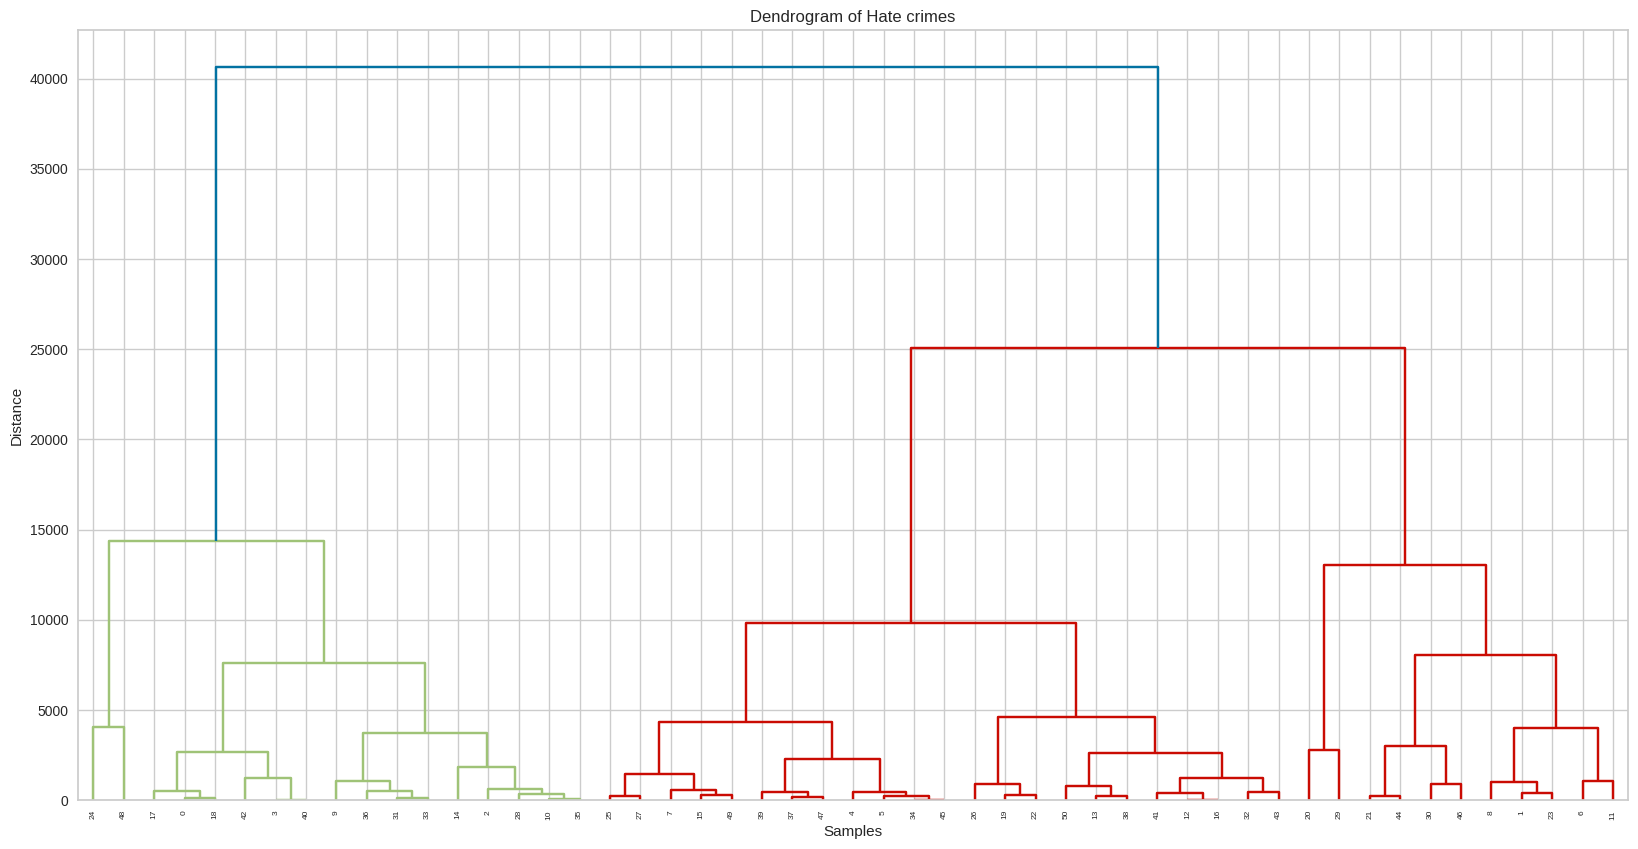

In [ ]:
Z = linkage(df5, method='complete')


plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.title('Dendrogram of Hate crimes')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
df_cluster

median_household_income  share_unemployed_seasonal  \
0                  0.166248                   0.711111   
1                  0.789981                   0.800000   
2                  0.337885                   0.777778   
3                  0.231301                   0.533333   
4                  0.614260                   0.688889   
5                  0.625406                   0.266667   
6                  0.852278                   0.533333   
7                  0.541310                   0.466667   
8                  0.805925                   0.866667   
9                  0.261269                   0.533333   
10                 0.345291                   0.666667   
11                 0.878408                   0.133333   
12                 0.440828                   0.311111   
13                 0.477192                   0.577778   
14                 0.308508                   0.355556   
15                 0.548396                   0.177778   
16                 0.440975                   0.355556   
17                 0.178747                   0.488889   
18                 0.169398                   0.711111   
19                 0.398312                   0.355556   
20                 1.000000                   0.511111   
21                 0.679805                   0.400000   
22                 0.405570                   0.488889   
23                 0.780509                   0.222222   
24                 0.000000                   0.733333   
25                 0.519363                   0.555556   
26                 0.383353                   0.288889   
27                 0.525268                   0.022222   
28                 0.353164                   0.866667   
29                 0.931896                   0.133333   
30                 0.731276                   0.622222   
31                 0.274702                   0.888889   
32                 0.462282                   0.511111   
33                 0.277113                   0.666667   
34                 0.620239                   0.000000   
35                 0.347481                   0.377778   
36                 0.287324                   0.355556   
37                 0.574599                   0.755556   
38                 0.483515                   0.555556   
39                 0.568645                   0.577778   
40                 0.231473                   0.644444   
41                 0.431355                   0.155556   
42                 0.201629                   0.644444   
43                 0.451580                   0.311111   
44                 0.685513                   0.177778   
45                 0.619698                   0.200000   
46                 0.753715                   0.333333   
47                 0.579348                   0.533333   
48                 0.099178                   1.000000   
49                 0.555039                   0.333333   
50                 0.496236                   0.266667   

    share_population_in_metro_areas  share_population_with_high_school_degree  \
0                          0.478261                                  0.184874   
1                          0.463768                                  0.966387   
2                          0.855072                                  0.361345   
3                          0.550725                                  0.210084   
4                          0.956522                                  0.058824   
5                          0.710145                                  0.789916   
6                          0.913043                                  0.731092   
7                          0.855072                                  0.630252   
8                          1.000000                                  0.605042   
9                          0.942029                                  0.453782   
10                         0.739130                                  0.336134   
11             

In [ ]:
df_cluster.columns

Index(['median_household_income', 'share_unemployed_seasonal',
       'share_population_in_metro_areas',
       'share_population_with_high_school_degree', 'share_non_citizen',
       'share_white_poverty', 'gini_index', 'share_non_white',
       'share_voters_voted_trump', 'Cluster'],
      dtype='object')

In [ ]:
df6 = df.iloc[:,1:-1]
df6

state  median_household_income  share_unemployed_seasonal  \
0                Alabama                    42278                      0.060   
1                 Alaska                    67629                      0.064   
2                Arizona                    49254                      0.063   
3               Arkansas                    44922                      0.052   
4             California                    60487                      0.059   
5               Colorado                    60940                      0.040   
6            Connecticut                    70161                      0.052   
7               Delaware                    57522                      0.049   
8   District of Columbia                    68277                      0.067   
9                Florida                    46140                      0.052   
10               Georgia                    49555                      0.058   
11                Hawaii                    71223                      0.034   
12                 Idaho                    53438                      0.042   
13              Illinois                    54916                      0.054   
14               Indiana                    48060                      0.044   
15                  Iowa                    57810                      0.036   
16                Kansas                    53444                      0.044   
17              Kentucky                    42786                      0.050   
18             Louisiana                    42406                      0.060   
19                 Maine                    51710                      0.044   
20              Maryland                    76165                      0.051   
21         Massachusetts                    63151                      0.046   
22              Michigan                    52005                      0.050   
23             Minnesota                    67244                      0.038   
24           Mississippi                    35521                      0.061   
25              Missouri                    56630                      0.053   
26               Montana                    51102                      0.041   
27              Nebraska                    56870                      0.029   
28                Nevada                    49875                      0.067   
29         New Hampshire                    73397                      0.034   
30            New Jersey                    65243                      0.056   
31            New Mexico                    46686                      0.068   
32              New York                    54310                      0.051   
33        North Carolina                    46784                      0.058   
34          North Dakota                    60730                      0.028   
35                  Ohio                    49644                      0.045   
36              Oklahoma                    47199                      0.044   
37                Oregon                    58875                      0.062   
38          Pennsylvania                    55173                      0.053   
39          Rhode Island                    58633                      0.054   
40        South Carolina                    44929                      0.057   
41          South Dakota                    53053                      0.035   
42             Tennessee                    43716                      0.057   
43                 Texas                    53875                      0.042   
44                  Utah                    63383                      0.036   
45               Vermont                    60708                      0.037   
46              Virginia                    66155                      0.043   
47            Washington                    59068                      0.052   
48         West Virginia                    39552                      0.073   
49             Wisc

In [ ]:
df6

state  median_household_income  share_unemployed_seasonal  \
0                Alabama                    42278                      0.060   
1                 Alaska                    67629                      0.064   
2                Arizona                    49254                      0.063   
3               Arkansas                    44922                      0.052   
4             California                    60487                      0.059   
5               Colorado                    60940                      0.040   
6            Connecticut                    70161                      0.052   
7               Delaware                    57522                      0.049   
8   District of Columbia                    68277                      0.067   
9                Florida                    46140                      0.052   
10               Georgia                    49555                      0.058   
11                Hawaii                    71223                      0.034   
12                 Idaho                    53438                      0.042   
13              Illinois                    54916                      0.054   
14               Indiana                    48060                      0.044   
15                  Iowa                    57810                      0.036   
16                Kansas                    53444                      0.044   
17              Kentucky                    42786                      0.050   
18             Louisiana                    42406                      0.060   
19                 Maine                    51710                      0.044   
20              Maryland                    76165                      0.051   
21         Massachusetts                    63151                      0.046   
22              Michigan                    52005                      0.050   
23             Minnesota                    67244                      0.038   
24           Mississippi                    35521                      0.061   
25              Missouri                    56630                      0.053   
26               Montana                    51102                      0.041   
27              Nebraska                    56870                      0.029   
28                Nevada                    49875                      0.067   
29         New Hampshire                    73397                      0.034   
30            New Jersey                    65243                      0.056   
31            New Mexico                    46686                      0.068   
32              New York                    54310                      0.051   
33        North Carolina                    46784                      0.058   
34          North Dakota                    60730                      0.028   
35                  Ohio                    49644                      0.045   
36              Oklahoma                    47199                      0.044   
37                Oregon                    58875                      0.062   
38          Pennsylvania                    55173                      0.053   
39          Rhode Island                    58633                      0.054   
40        South Carolina                    44929                      0.057   
41          South Dakota                    53053                      0.035   
42             Tennessee                    43716                      0.057   
43                 Texas                    53875                      0.042   
44                  Utah                    63383                      0.036   
45               Vermont                    60708                      0.037   
46              Virginia                    66155                      0.043   
47            Washington                    59068                      0.052   
48         West Virginia                    39552                      0.073   
49             Wisc

In [ ]:
df_cluster1=df6.loc[(df['Cluster'] == 0)]

In [ ]:
df_cluster1

state  median_household_income  share_unemployed_seasonal  \
1                 Alaska                    67629                      0.064   
6            Connecticut                    70161                      0.052   
8   District of Columbia                    68277                      0.067   
11                Hawaii                    71223                      0.034   
20              Maryland                    76165                      0.051   
21         Massachusetts                    63151                      0.046   
23             Minnesota                    67244                      0.038   
29         New Hampshire                    73397                      0.034   
30            New Jersey                    65243                      0.056   
44                  Utah                    63383                      0.036   
46              Virginia                    66155                      0.043   

    share_population_in_metro_areas  share_population_with_high_school_degree  \
1                              0.63                                     0.914   
6                              0.94                                     0.886   
8                              1.00                                     0.871   
11                             0.76                                     0.904   
20                             0.97                                     0.890   
21                             0.97                                     0.890   
23                             0.75                                     0.915   
29                             0.63                                     0.913   
30                             1.00                                     0.874   
44                             0.82                                     0.904   
46                             0.89                                     0.866   

    share_non_citizen  share_white_poverty  gini_index  share_non_white  \
1                0.04                 0.06       0.422             0.42   
6                0.06                 0.06       0.486             0.30   
8                0.11                 0.04       0.532             0.63   
11               0.08                 0.07       0.433             0.81   
20               0.08                 0.06       0.443             0.50   
21               0.09                 0.08       0.475             0.27   
23               0.05                 0.05       0.440             0.18   
29               0.03                 0.06       0.425             0.09   
30               0.11                 0.07       0.464             0.44   
44               0.04                 0.08       0.419             0.19   
46               0.06                 0.07       0.459             0.38   

    share_voters_voted_trump  Cluster  
1                       0.53        0  
6                       0.41        0  
8                       0.04        0  
11                      0.30        0  
20                      0.35        0  
21                      0.34        0  
23                      0.45        0  
29                      0.47        0  
30                      0.42        0  
44                      0.47        0  
46                      0.45        0

In [ ]:
df_cluster2=df6.loc[(df['Cluster'] == 1)]
df_cluster2

state  median_household_income  share_unemployed_seasonal  \
4     California                    60487                      0.059   
5       Colorado                    60940                      0.040   
7       Delaware                    57522                      0.049   
12         Idaho                    53438                      0.042   
13      Illinois                    54916                      0.054   
15          Iowa                    57810                      0.036   
16        Kansas                    53444                      0.044   
19         Maine                    51710                      0.044   
22      Michigan                    52005                      0.050   
25      Missouri                    56630                      0.053   
26       Montana                    51102                      0.041   
27      Nebraska                    56870                      0.029   
32      New York                    54310                      0.051   
34  North Dakota                    60730                      0.028   
37        Oregon                    58875                      0.062   
38  Pennsylvania                    55173                      0.053   
39  Rhode Island                    58633                      0.054   
41  South Dakota                    53053                      0.035   
43         Texas                    53875                      0.042   
45       Vermont                    60708                      0.037   
47    Washington                    59068                      0.052   
49     Wisconsin                    58080                      0.043   
50       Wyoming                    55690                      0.040   

    share_population_in_metro_areas  share_population_with_high_school_degree  \
4                              0.97                                     0.806   
5                              0.80                                     0.893   
7                              0.90                                     0.874   
12                             0.70                                     0.884   
13                             0.90                                     0.864   
15                             0.60                                     0.914   
16                             0.64                                     0.897   
19                             0.54                                     0.902   
22                             0.87                                     0.879   
25                             0.78                                     0.868   
26                             0.34                                     0.908   
27                             0.60                                     0.898   
32                             0.94                                     0.847   
34                             0.50                                     0.901   
37                             0.87                                     0.891   
38                             0.87                                     0.879   
39                             1.00                                     0.847   
41                             0.51                                     0.899   
43                             0.92                                     0.799   
45                             0.35                                     0.910   
47                             0.86                                     0.897   
49                             0.69                                     0.898   
50                             0.31                                     0.918   

    share_non_citizen  share_white_poverty  gini_index  share_non_white  \
4            0.130000                 0.09       0.471             0.61   
5            0.060000                 0.07       0.457             0.31   
7            0.050000                 0.08       0.440             0.37   
12           0.040000                

In [ ]:
df_cluster3=df6.loc[(df['Cluster'] == 2)]
df_cluster3

state  median_household_income  share_unemployed_seasonal  \
0          Alabama                    42278                      0.060   
2          Arizona                    49254                      0.063   
3         Arkansas                    44922                      0.052   
9          Florida                    46140                      0.052   
10         Georgia                    49555                      0.058   
14         Indiana                    48060                      0.044   
17        Kentucky                    42786                      0.050   
18       Louisiana                    42406                      0.060   
24     Mississippi                    35521                      0.061   
28          Nevada                    49875                      0.067   
31      New Mexico                    46686                      0.068   
33  North Carolina                    46784                      0.058   
35            Ohio                    49644                      0.045   
36        Oklahoma                    47199                      0.044   
40  South Carolina                    44929                      0.057   
42       Tennessee                    43716                      0.057   
48   West Virginia                    39552                      0.073   

    share_population_in_metro_areas  share_population_with_high_school_degree  \
0                              0.64                                     0.821   
2                              0.90                                     0.842   
3                              0.69                                     0.824   
9                              0.96                                     0.853   
10                             0.82                                     0.839   
14                             0.79                                     0.866   
17                             0.56                                     0.817   
18                             0.81                                     0.822   
24                             0.45                                     0.804   
28                             0.87                                     0.839   
31                             0.69                                     0.828   
33                             0.76                                     0.843   
35                             0.75                                     0.876   
36                             0.59                                     0.856   
40                             0.79                                     0.836   
42                             0.82                                     0.831   
48                             0.55                                     0.828   

    share_non_citizen  share_white_poverty  gini_index  share_non_white  \
0            0.020000                 0.12       0.472             0.35   
2            0.100000                 0.09       0.455             0.49   
3            0.040000                 0.12       0.458             0.26   
9            0.090000                 0.11       0.474             0.46   
10           0.080000                 0.09       0.468             0.48   
14           0.030000                 0.12       0.440             0.20   
17           0.030000                 0.17       0.466             0.15   
18           0.020000                 0.12       0.475             0.42   
24           0.054583                 0.14       0.468             0.44   
28           0.100000                 0.08       0.448             0.50   
31           0.060000                 0.10       0.464             0.62   
33           0.050000                 0.10       0.464             0.38   
35           0.030000                 0.10       0.452             0.21   
36           0.040000                 0.10       0.454             0.35   
40           0.030000                 0.09       0.461             0.36   
42           0.040000

In [ ]:
df7.insert(11, column = 'Cluster', value = df_cluster['Cluster'])

In [ ]:
df7 = df.iloc[:,1:]
df7

state  median_household_income  share_unemployed_seasonal  \
0                Alabama                    42278                      0.060   
1                 Alaska                    67629                      0.064   
2                Arizona                    49254                      0.063   
3               Arkansas                    44922                      0.052   
4             California                    60487                      0.059   
5               Colorado                    60940                      0.040   
6            Connecticut                    70161                      0.052   
7               Delaware                    57522                      0.049   
8   District of Columbia                    68277                      0.067   
9                Florida                    46140                      0.052   
10               Georgia                    49555                      0.058   
11                Hawaii                    71223                      0.034   
12                 Idaho                    53438                      0.042   
13              Illinois                    54916                      0.054   
14               Indiana                    48060                      0.044   
15                  Iowa                    57810                      0.036   
16                Kansas                    53444                      0.044   
17              Kentucky                    42786                      0.050   
18             Louisiana                    42406                      0.060   
19                 Maine                    51710                      0.044   
20              Maryland                    76165                      0.051   
21         Massachusetts                    63151                      0.046   
22              Michigan                    52005                      0.050   
23             Minnesota                    67244                      0.038   
24           Mississippi                    35521                      0.061   
25              Missouri                    56630                      0.053   
26               Montana                    51102                      0.041   
27              Nebraska                    56870                      0.029   
28                Nevada                    49875                      0.067   
29         New Hampshire                    73397                      0.034   
30            New Jersey                    65243                      0.056   
31            New Mexico                    46686                      0.068   
32              New York                    54310                      0.051   
33        North Carolina                    46784                      0.058   
34          North Dakota                    60730                      0.028   
35                  Ohio                    49644                      0.045   
36              Oklahoma                    47199                      0.044   
37                Oregon                    58875                      0.062   
38          Pennsylvania                    55173                      0.053   
39          Rhode Island                    58633                      0.054   
40        South Carolina                    44929                      0.057   
41          South Dakota                    53053                      0.035   
42             Tennessee                    43716                      0.057   
43                 Texas                    53875                      0.042   
44                  Utah                    63383                      0.036   
45               Vermont                    60708                      0.037   
46              Virginia                    66155                      0.043   
47            Washington                    59068                      0.052   
48         West Virginia                    39552                      0.073   
49             Wisc

In [ ]:
df_cluster1=df7.loc[(df['Cluster'] == 0)]
df_cluster1.head()

state  median_household_income  share_unemployed_seasonal  \
1                 Alaska                    67629                      0.064   
6            Connecticut                    70161                      0.052   
8   District of Columbia                    68277                      0.067   
11                Hawaii                    71223                      0.034   
20              Maryland                    76165                      0.051   

    share_population_in_metro_areas  share_population_with_high_school_degree  \
1                              0.63                                     0.914   
6                              0.94                                     0.886   
8                              1.00                                     0.871   
11                             0.76                                     0.904   
20                             0.97                                     0.890   

    share_non_citizen  share_white_poverty  gini_index  share_non_white  \
1                0.04                 0.06       0.422             0.42   
6                0.06                 0.06       0.486             0.30   
8                0.11                 0.04       0.532             0.63   
11               0.08                 0.07       0.433             0.81   
20               0.08                 0.06       0.443             0.50   

    share_voters_voted_trump  avg_hatecrimes_per_100k_fbi  Cluster  
1                       0.53                     1.656700        0  
6                       0.41                     3.772701        0  
8                       0.04                    10.953480        0  
11                      0.30                     2.367613        0  
20                      0.35                     1.324840        0

In [ ]:
df_cluster2=df7.loc[(df['Cluster'] == 1)]
df_cluster2.head()

state  median_household_income  share_unemployed_seasonal  \
4   California                    60487                      0.059   
5     Colorado                    60940                      0.040   
7     Delaware                    57522                      0.049   
12       Idaho                    53438                      0.042   
13    Illinois                    54916                      0.054   

    share_population_in_metro_areas  share_population_with_high_school_degree  \
4                              0.97                                     0.806   
5                              0.80                                     0.893   
7                              0.90                                     0.874   
12                             0.70                                     0.884   
13                             0.90                                     0.864   

    share_non_citizen  share_white_poverty  gini_index  share_non_white  \
4                0.13                 0.09       0.471             0.61   
5                0.06                 0.07       0.457             0.31   
7                0.05                 0.08       0.440             0.37   
12               0.04                 0.11       0.433             0.16   
13               0.07                 0.07       0.465             0.37   

    share_voters_voted_trump  avg_hatecrimes_per_100k_fbi  Cluster  
4                       0.33                     2.397986        1  
5                       0.44                     2.804689        1  
7                       0.42                     1.469980        1  
12                      0.59                     1.891331        1  
13                      0.39                     1.044016        1

In [ ]:
df_cluster3=df7.loc[(df['Cluster'] == 2)]
df_cluster3.head()

state  median_household_income  share_unemployed_seasonal  \
0    Alabama                    42278                      0.060   
2    Arizona                    49254                      0.063   
3   Arkansas                    44922                      0.052   
9    Florida                    46140                      0.052   
10   Georgia                    49555                      0.058   

    share_population_in_metro_areas  share_population_with_high_school_degree  \
0                              0.64                                     0.821   
2                              0.90                                     0.842   
3                              0.69                                     0.824   
9                              0.96                                     0.853   
10                             0.82                                     0.839   

    share_non_citizen  share_white_poverty  gini_index  share_non_white  \
0                0.02                 0.12       0.472             0.35   
2                0.10                 0.09       0.455             0.49   
3                0.04                 0.12       0.458             0.26   
9                0.09                 0.11       0.474             0.46   
10               0.08                 0.09       0.468             0.48   

    share_voters_voted_trump  avg_hatecrimes_per_100k_fbi  Cluster  
0                       0.63                     1.806410        2  
2                       0.50                     3.413928        2  
3                       0.60                     0.869209        2  
9                       0.49                     0.698070        2  
10                      0.51                     0.412012        2

Clustering results can help inform targeted interventions and policies to address hate crimes. By understanding the characteristics of different clusters, policymakers and stakeholders can design strategies tailored to the specific needs and challenges faced by states within each cluster.

Income Inequality and Hate Crimes: The clustering results may show a cluster with a higher gini index, indicating greater income inequality. This suggests a potential link between income disparities and hate crime rates, implying that socio-economic inequality may contribute to social tensions leading to hate crimes.

The clustering results provide insights into the relationship between socio-economic factors and hate crime rates. For example, one cluster may include states with lower median household income, higher unemployment rates, lower levels of education, and higher poverty rates. This cluster could suggest that socio-economic disparities contribute to higher hate crime rates in those areas.

In [ ]:
new_data = [[49254, 0.063, 0.9, 0.842, 0.1, 0.09, 0.455, 0.49, 0.5]]
predictions = kmeans.predict(new_data)


for point, prediction in zip(new_data, predictions):
    print(f"Data point {point} belongs to cluster {prediction}")

Data point [49254, 0.063, 0.9, 0.842, 0.1, 0.09, 0.455, 0.49, 0.5] belongs to cluster 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
